<a href="https://colab.research.google.com/github/praffs18/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Mohammed Yahya Ansari
##### **Team Member 2 -** Prafull Korde

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Github Repository - https://github.com/praffs18/Bike-Sharing-Demand-Prediction

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import warnings
import warnings
warnings.filterwarnings('ignore')
     
#import preporcessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Import model selection libraries
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

# Import Outlier influence library
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

#Import Metrics evaluation libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

from prettytable import PrettyTable

### Dataset Loading

In [ ]:
# Load Dataset from github repository
url = 'https://raw.githubusercontent.com/praffs18/Bike-Sharing-Demand-Prediction/main/SeoulBikeData.csv'
data = pd.read_csv(url, encoding='unicode_escape')

### Dataset First View

In [ ]:
# View top 5 rows of the dataset
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [ ]:
# View last 5 rows of the dataset
data.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [ ]:
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",data.shape[0])
print("Number of columns are: ",data.shape[1])

Number of rows are:  8760
Number of columns are:  14


### Dataset Information

In [ ]:
# Checking information about the dataset using info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Checking duplicated rows count
data.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Checking missing values/null values count for each column
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

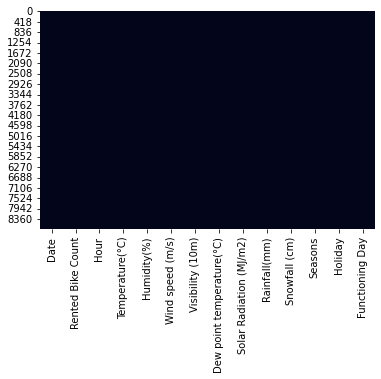

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(data.isnull(), cbar=False)

### What did you know about your dataset?

There are a total of 14 feature columns where Rented Bike Count is the dependent variable column.
The total number of observations(rows) are 8760.

There are no duplicate rows on the dataset.

Also there are no missing values or Null values in the dataset.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe (all columns included)
data.describe(include= 'all').round(2)

Date  Rented Bike Count     Hour  Temperature(°C)  Humidity(%)  \
count         8760            8760.00  8760.00          8760.00      8760.00   
unique         365                NaN      NaN              NaN          NaN   
top     01/12/2017                NaN      NaN              NaN          NaN   
freq            24                NaN      NaN              NaN          NaN   
mean           NaN             704.60    11.50            12.88        58.23   
std            NaN             645.00     6.92            11.94        20.36   
min            NaN               0.00     0.00           -17.80         0.00   
25%            NaN             191.00     5.75             3.50        42.00   
50%            NaN             504.50    11.50            13.70        57.00   
75%            NaN            1065.25    17.25            22.50        74.00   
max            NaN            3556.00    23.00            39.40        98.00   

        Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count            8760.00           8760.00                    8760.00   
unique               NaN               NaN                        NaN   
top                  NaN               NaN                        NaN   
freq                 NaN               NaN                        NaN   
mean                1.72           1436.83                       4.07   
std                 1.04            608.30                      13.06   
min                 0.00             27.00                     -30.60   
25%                 0.90            940.00                      -4.70   
50%                 1.50           1698.00                       5.10   
75%                 2.30           2000.00                      14.80   
max                 7.40           2000.00                      27.20   

        Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
count                   8760.00       8760.00        8760.00    8760   
unique                      NaN           NaN            NaN       4   
top                         NaN           NaN            NaN  Spring   
freq                        NaN           NaN            NaN    2208   
mean                       0.57          0.15           0.08     NaN   
std                        0.87          1.13           0.44     NaN   
min                        0.00          0.00           0.00     NaN   
25%                        0.00          0.00           0.00     NaN   
50%                        0.01          0.00           0.00     NaN   
75%                        0.93          0.00           0.00     NaN   
max                        3.52         35.00           8.80     NaN   

           Holiday Functioning Day  
count         8760            8760  
unique           2               2  
top     No Holiday             Yes  
freq          8328            8465  
mean           NaN             NaN  
std            NaN             NaN  
min            NaN             NaN  
25%            NaN             NaN  
50%            NaN             NaN  
75%            NaN             NaN  
max            NaN             NaN

### Variables Description 

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


<b>Attribute Information: </b>

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)Answer Here

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable using a for loop
for i in data.columns.tolist():
  print("No. of unique values in",i,"is",data[i].nunique())

No. of unique values in Date is 365
No. of unique values in Rented Bike Count is 2166
No. of unique values in Hour is 24
No. of unique values in Temperature(°C) is 546
No. of unique values in Humidity(%) is 90
No. of unique values in Wind speed (m/s) is 65
No. of unique values in Visibility (10m) is 1789
No. of unique values in Dew point temperature(°C) is 556
No. of unique values in Solar Radiation (MJ/m2) is 345
No. of unique values in Rainfall(mm) is 61
No. of unique values in Snowfall (cm) is 51
No. of unique values in Seasons is 4
No. of unique values in Holiday is 2
No. of unique values in Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Before doing any data wrangling lets create copy of the dataset
data_2 = data.copy()

In [ ]:
# Renaming the columns
data_2.rename(columns= {'Date':'date','Rented Bike Count': 'rented_bike_count', 'Hour':'hour',
                    'Temperature(°C)':'temperature', 'Humidity(%)':'humidity',
                    'Wind speed (m/s)': 'wind_speed', 'Visibility (10m)': 'visibility',
                    'Dew point temperature(°C)':'dew_point_temp',
                    'Solar Radiation (MJ/m2)': 'solar_radiation', 'Rainfall(mm)': 'rainfall',
                    'Snowfall (cm)':'snowfall', 'Seasons':'seasons',
                    'Holiday':'holiday', 'Functioning Day':'func_day'},
          inplace=True)

In [ ]:
data_2.columns

Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temp', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'func_day'],
      dtype='object')

In [ ]:
# converting date variable in to datetime datatype
data_2['date'] = data_2['date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [ ]:
# Creating new columns for day and month
data_2['month'] = data_2['date'].apply(lambda x : x.month)
data_2['day_of_week'] = data_2['date'].apply(lambda x : x.isoweekday())

In [ ]:
# engineering new feature 'weekend' from day_of_week
data_2['weekend'] = data_2['day_of_week'].apply(lambda x: 1 if x>5 else 0)

In [ ]:
data_2.describe(include='all').round(2)

date  rented_bike_count     hour  temperature  \
count                  8760            8760.00  8760.00      8760.00   
unique                  365                NaN      NaN          NaN   
top     2017-12-01 00:00:00                NaN      NaN          NaN   
freq                     24                NaN      NaN          NaN   
first   2017-12-01 00:00:00                NaN      NaN          NaN   
last    2018-11-30 00:00:00                NaN      NaN          NaN   
mean                    NaN             704.60    11.50        12.88   
std                     NaN             645.00     6.92        11.94   
min                     NaN               0.00     0.00       -17.80   
25%                     NaN             191.00     5.75         3.50   
50%                     NaN             504.50    11.50        13.70   
75%                     NaN            1065.25    17.25        22.50   
max                     NaN            3556.00    23.00        39.40   

        humidity  wind_speed  visibility  dew_point_temp  solar_radiation  \
count    8760.00     8760.00     8760.00         8760.00          8760.00   
unique       NaN         NaN         NaN             NaN              NaN   
top          NaN         NaN         NaN             NaN              NaN   
freq         NaN         NaN         NaN             NaN              NaN   
first        NaN         NaN         NaN             NaN              NaN   
last         NaN         NaN         NaN             NaN              NaN   
mean       58.23        1.72     1436.83            4.07             0.57   
std        20.36        1.04      608.30           13.06             0.87   
min         0.00        0.00       27.00          -30.60             0.00   
25%        42.00        0.90      940.00           -4.70             0.00   
50%        57.00        1.50     1698.00            5.10             0.01   
75%        74.00        2.30     2000.00           14.80             0.93   
max        98.00        7.40     2000.00           27.20             3.52   

        rainfall  snowfall seasons     holiday func_day    month  day_of_week  \
count    8760.00   8760.00    8760        8760     8760  8760.00       8760.0   
unique       NaN       NaN       4           2        2      NaN          NaN   
top          NaN       NaN  Spring  No Holiday      Yes      NaN          NaN   
freq         NaN       NaN    2208        8328     8465      NaN          NaN   
first        NaN       NaN     NaN         NaN      NaN      NaN          NaN   
last         NaN       NaN     NaN         NaN      NaN      NaN          NaN   
mean        0.15      0.08     NaN         NaN      NaN     6.53          4.0   
std         1.13      0.44     NaN         NaN      NaN     3.45          2.0   
min         0.00      0.00     NaN         NaN      NaN     1.00          1.0   
25%         0.00      0.00     NaN         NaN      NaN     4.00          2.0   
50%         0.00      0.00     NaN         NaN      NaN     7.00          4.0   
75%         0.00      0.00     NaN         NaN      NaN    10.00          6.0   
max        35.00      8.80     NaN         NaN      NaN    12.00          7.0   

        weekend  
count   8760.00  
unique      NaN  
top         NaN  
freq        NaN  
first       NaN  
last        NaN  
mean       0.28  
std        0.45  
min        0.00  
25%        0.00  
50%        0.00  
75%        1.00  
max        1.00

In [ ]:
# defining continuous independent variables separately
cont_var = ['temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temp','solar_radiation', 'rainfall', 'snowfall']

In [ ]:
# Defining dependent variable
dependent_variable = ['rented_bike_count']

In [ ]:
# defining categorical independent variables separately
cat_var = ['hour','seasons', 'holiday', 'func_day', 'month', 'day_of_week', 'weekend']

### What all manipulations have you done and insights you found?

From the Date column, 'month' and 'day of the week' columns are created.

From the day of the week column, weekend column is created where 6 and 7 are the weekends (Saturday and Sunday).

We have also defined the continuous variables, dependent variable and categorical variables for ease of plotting graphs.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

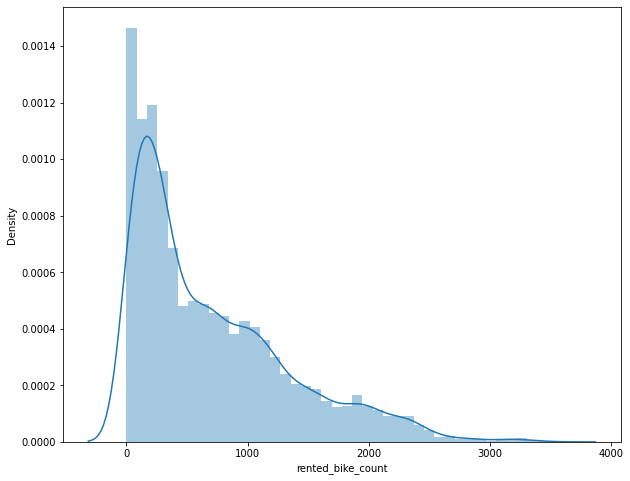

In [ ]:
# Chart-1 Visualization code for distribution of target variable
plt.figure(figsize=(10,8))
sns.distplot(data_2['rented_bike_count'])
plt.show()

##### 1. Why did you pick the specific chart?

A distplot, also known as a histogram-kernel density estimate (KDE) plot. It is useful because it provides a quick and easy way to check the distribution of the data, identify patterns or outliers, and compare the distribution of multiple variables. It also allows to check if the data is following normal distribution or not.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

##### 2. What is/are the insight(s) found from the chart?

From above distribution plot of dependent variable rented bike, we can clearly see that the distribution is positively skewed (Right skewed).

It means that distribution is not symmetric around the the mean. there are few high values or outliers that are pulling the mean higher.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definately from this insight we got to know that we our data is not normally distributed so, before doing or implementing any model on this data we need to normalies this data.

#### Chart - 2

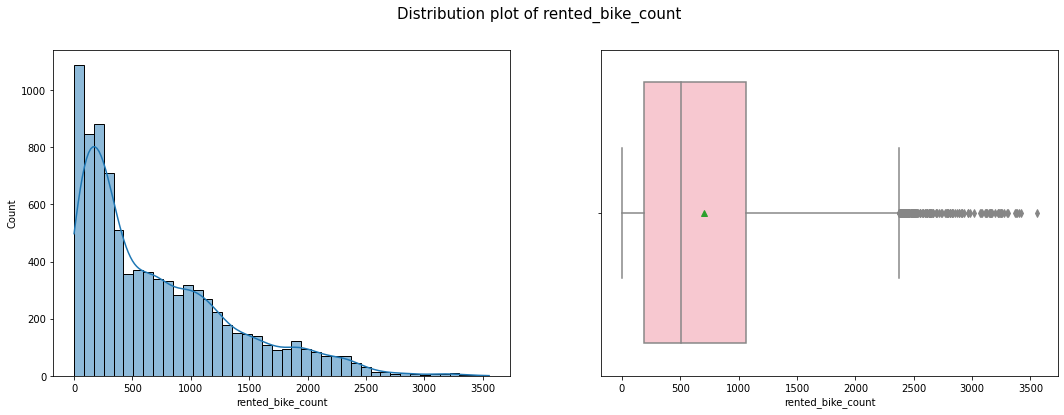

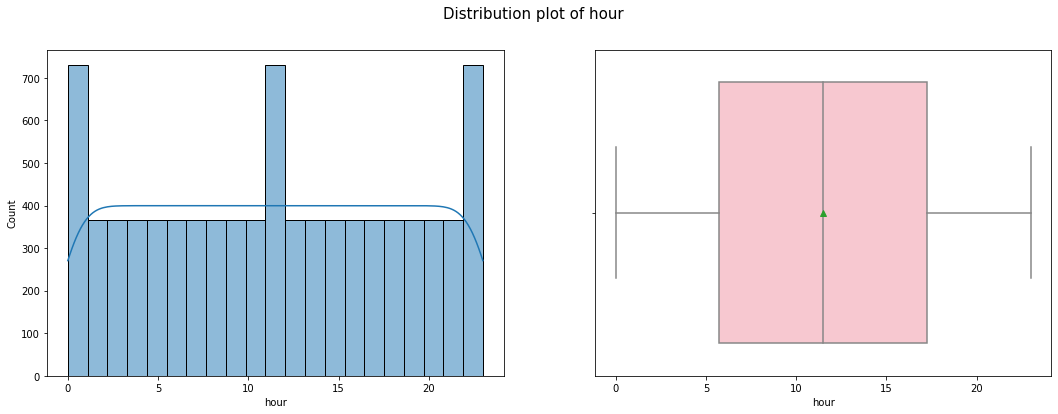

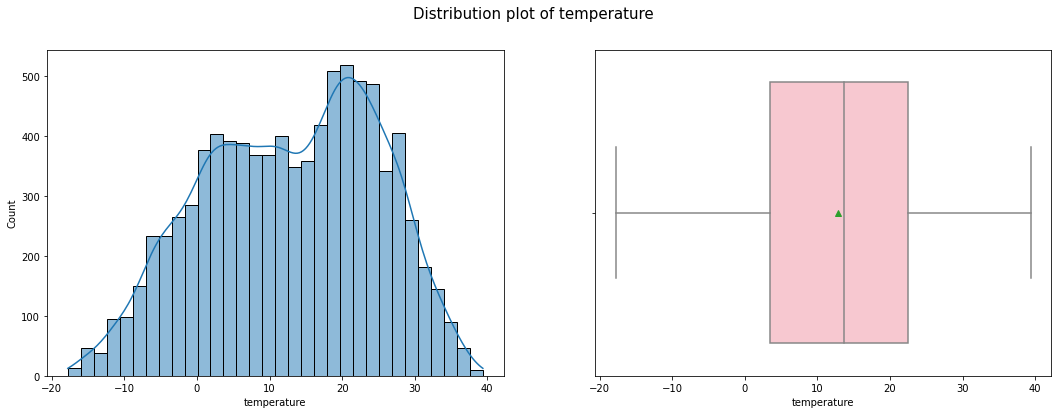

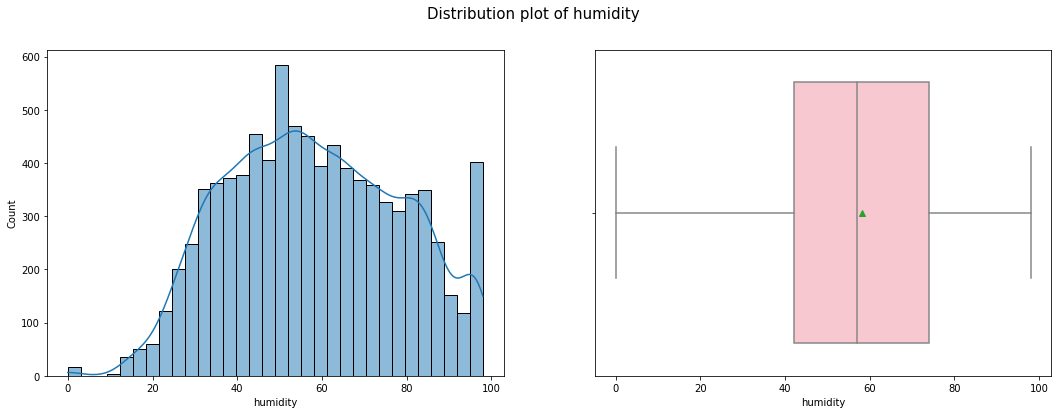

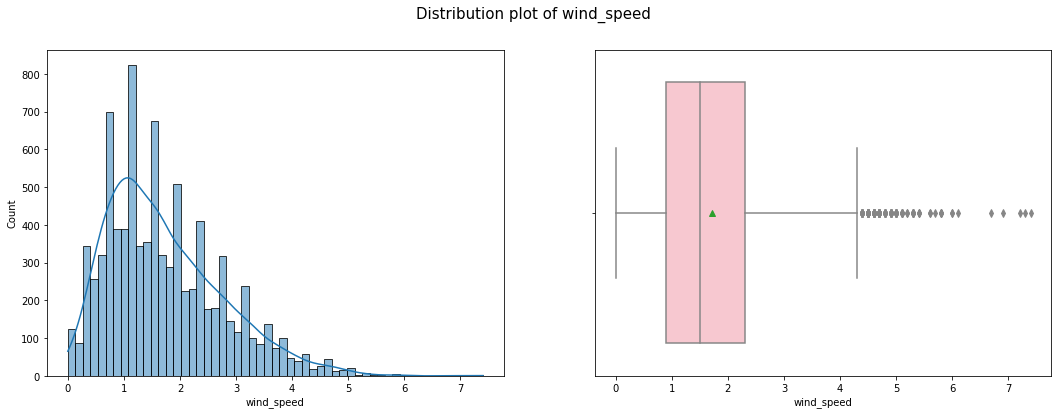

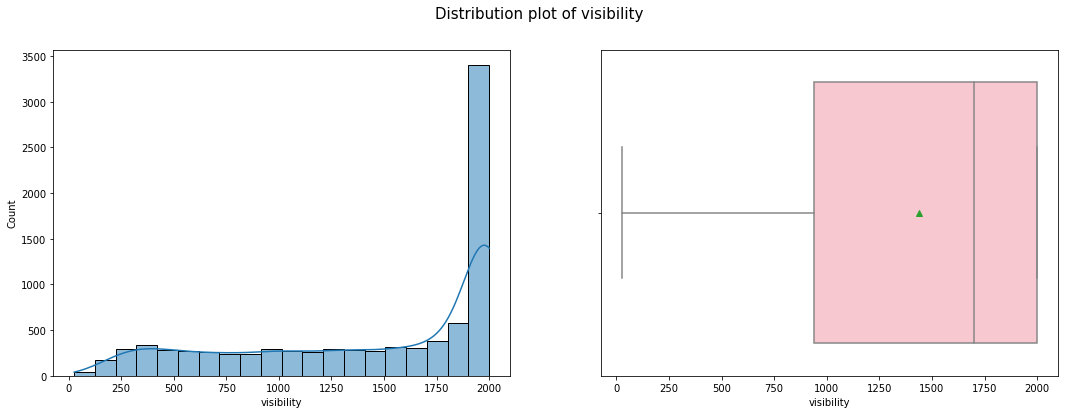

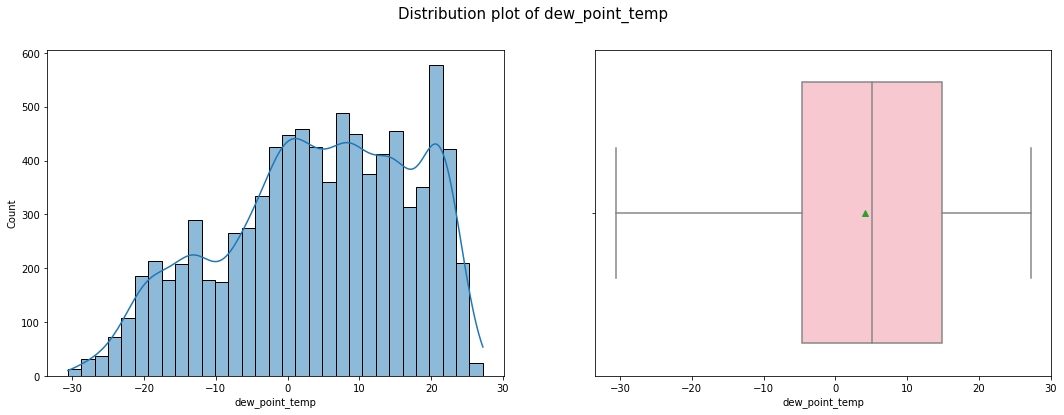

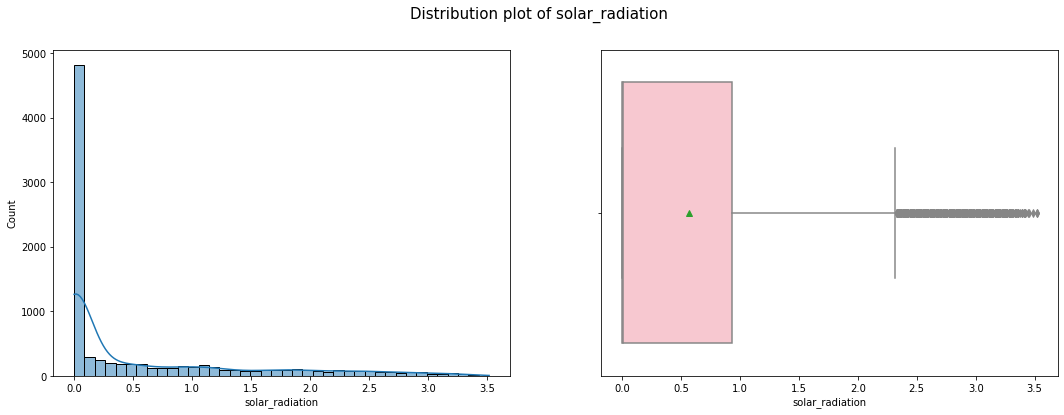

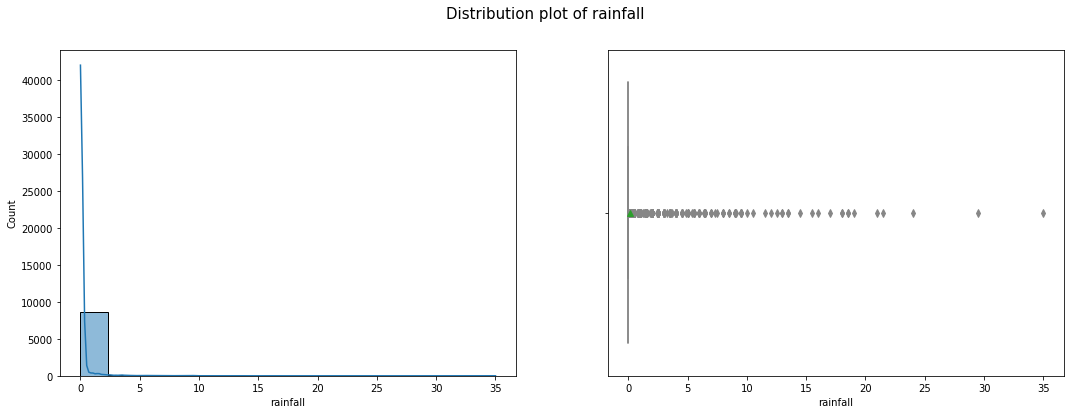

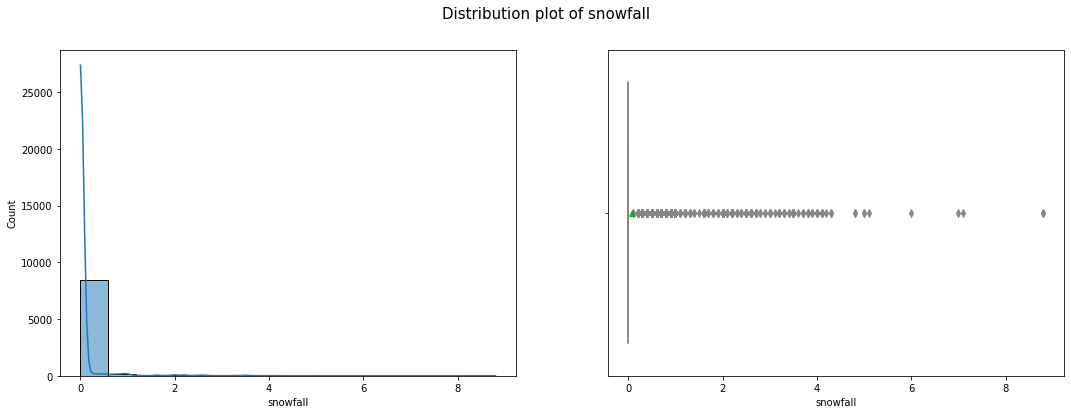

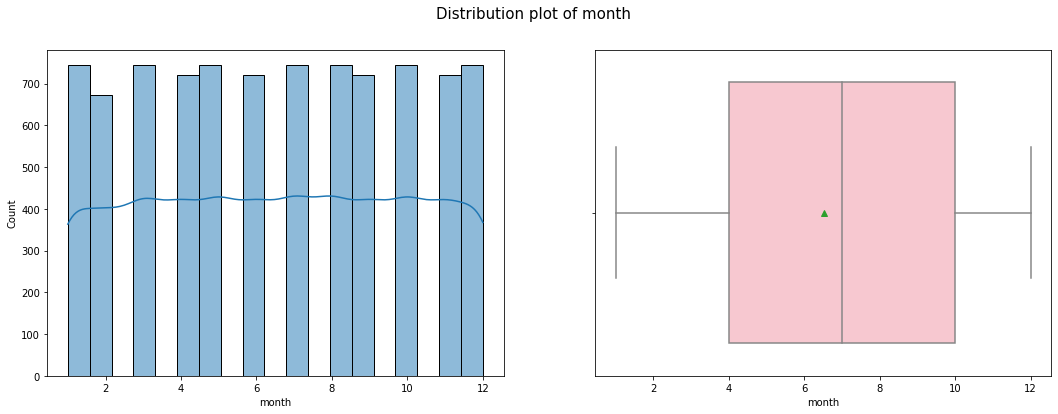

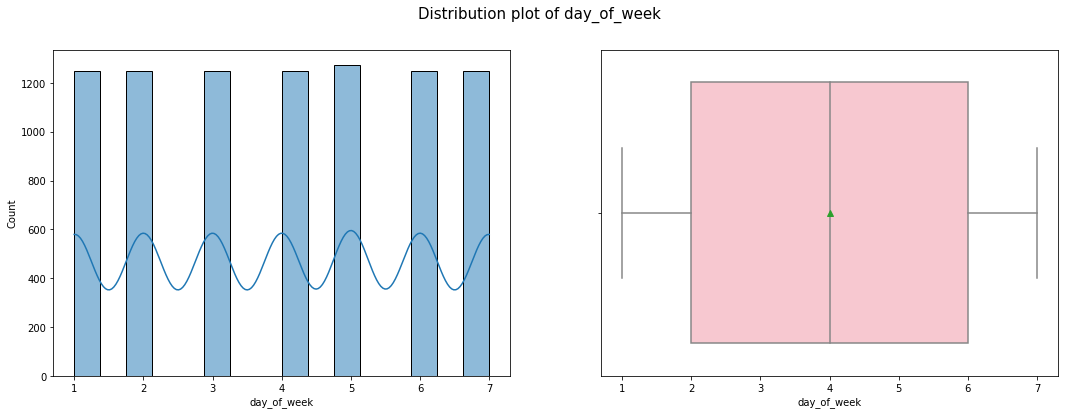

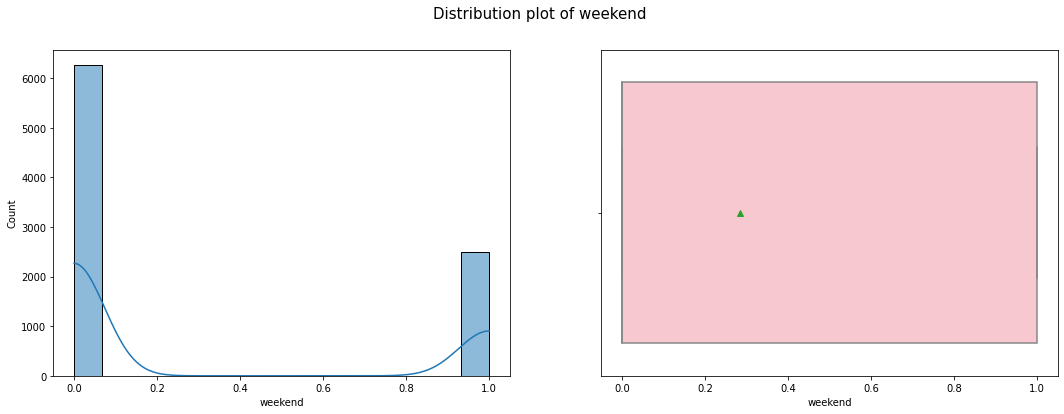

In [ ]:
# Visualizing code of histogram plot & boxplot for each columns to know the data distribution
for col in data_2.describe().columns:
    fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
    sns.histplot(data_2[col], ax = axes[0],kde = True)
    sns.boxplot(data_2[col], ax = axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Distribution plot of "+ col, fontsize = 15)
    plt.show()

##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, we used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

A boxplot is used to summarize the key statistical characteristics of a dataset, including the median, quartiles, and range, in a single plot. Boxplots are useful for identifying the presence of outliers in a dataset, comparing the distribution of multiple datasets, and understanding the dispersion of the data. They are often used in statistical analysis and data visualization.

Thus, for each numerical varibale in the given dataset, we used box plot to analyse the outliers and interquartile range including mean, median, maximum and minimum value.

##### 2. What is/are the insight(s) found from the chart?

From above univariate analysis of all continuous feature variables. we got to know that only tempture and humidity columns are looks normally distributed others shows the different distributions. 

Also we can see that there are outlier values in snowfall, rainfall, wind speed & solar radiation columns

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Histogram and Box plot cannot give us whole information regarding data. It's done just to see the distribution of the column data over the dataset.

#### Chart - 3 : Dependent variable with continuous variables (Bivariate)

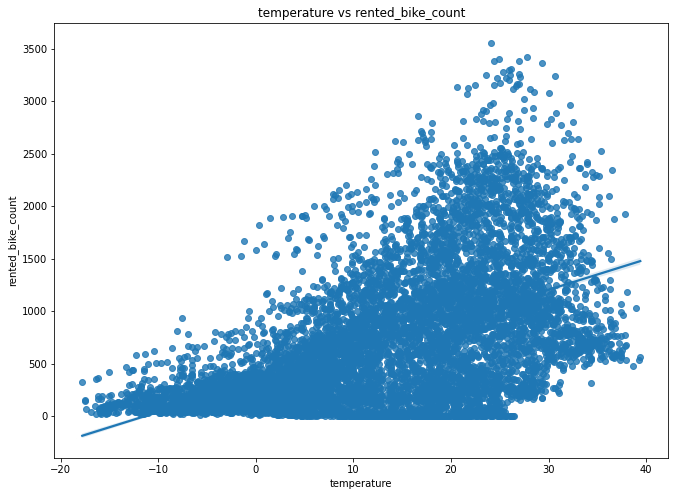

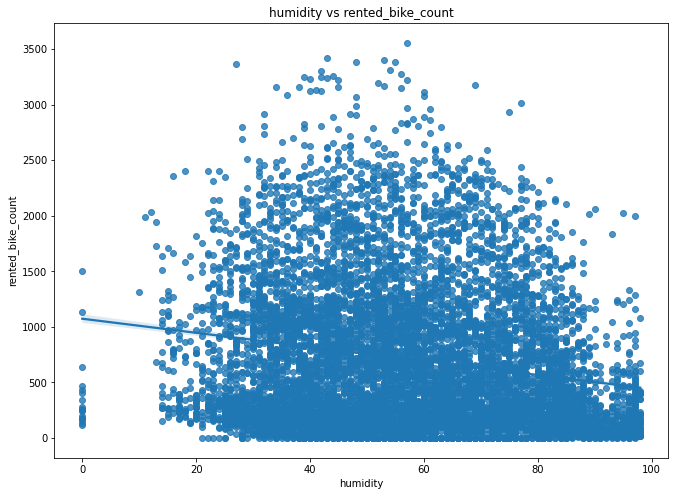

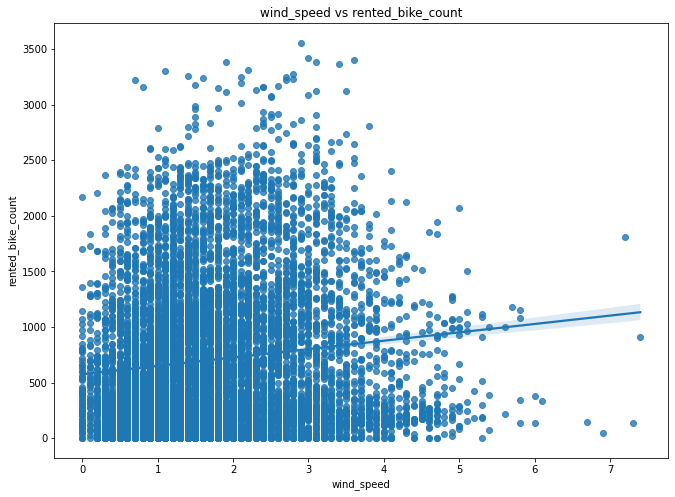

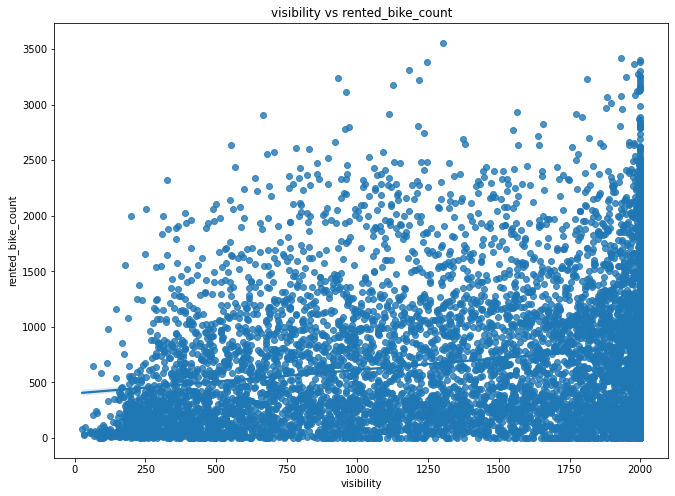

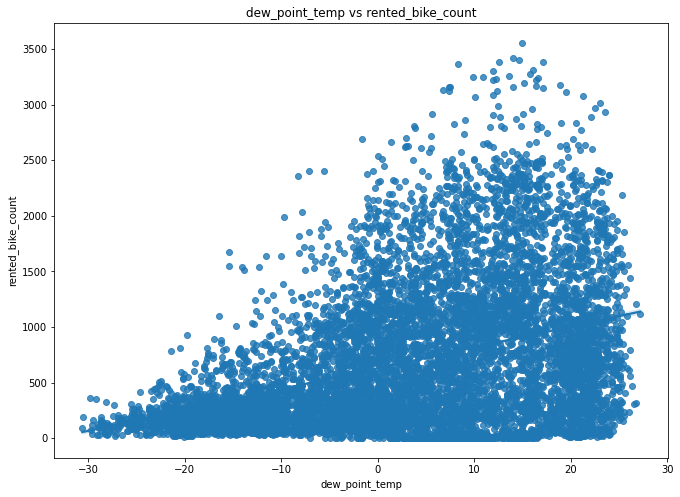

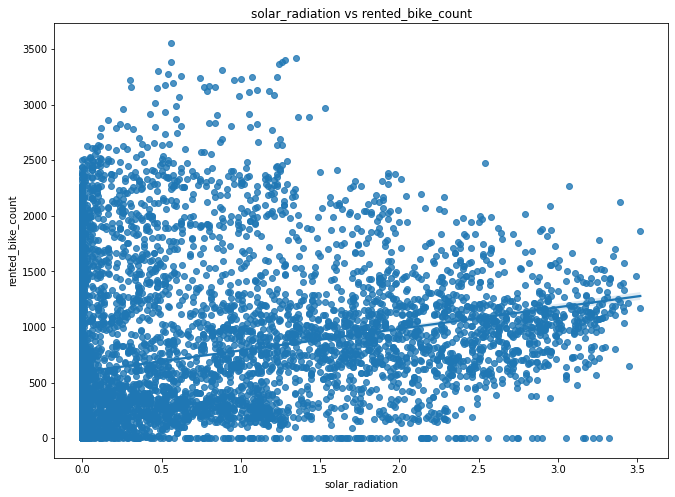

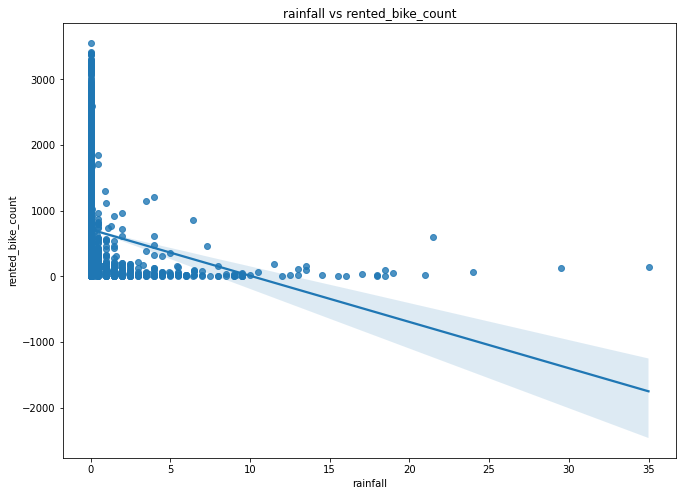

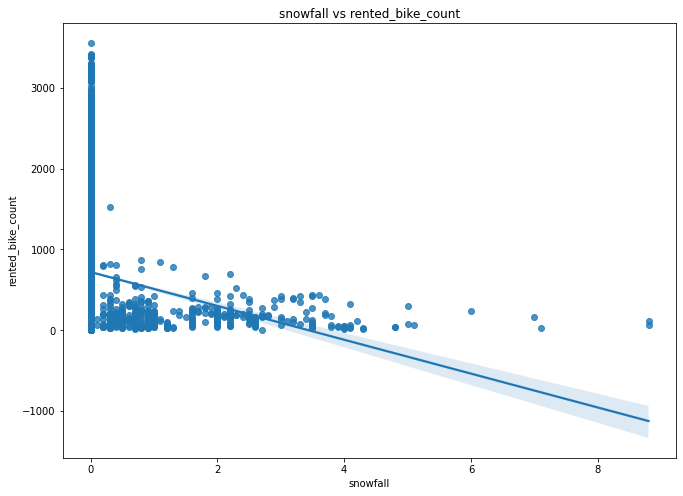

In [ ]:
# Analyzing the relationship between the dependent variable and the continuous variables
for i in cont_var:
  plt.figure(figsize=(11,8))
  sns.regplot(x=i,y=dependent_variable[0],data=data_2)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Regplot is used to create a scatter plot with linear regression line. The purpose of this function is to visualize the relationship between two continuous variables. It can help to identify patterns and trends in the data, and can also be used to test for linearity and independence of the variables.

To check the patterns between independent variable with our rented bike dependent variable we used this regplot.

##### 2. What is/are the insight(s) found from the chart?

From above regression plot we can see that there is some linearity between temperature, solar radiation & dew point temperature with dependent variable rented bike

Other variables are not showing any patterns.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helped a little bit from this we got to know that there are few variables which are showing some patterns with dependent variable this variable are maybe important feature while predicting for rented bike count so business needs focus on this variables.

#### Chart - 4 : Categorical variables with dependent variable (bivariate)

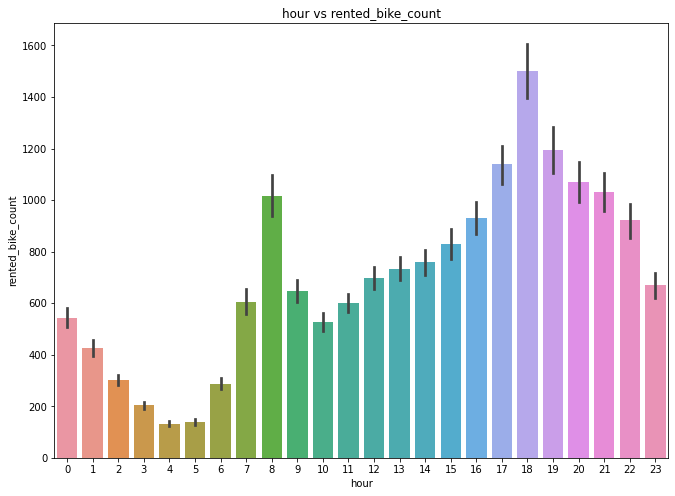

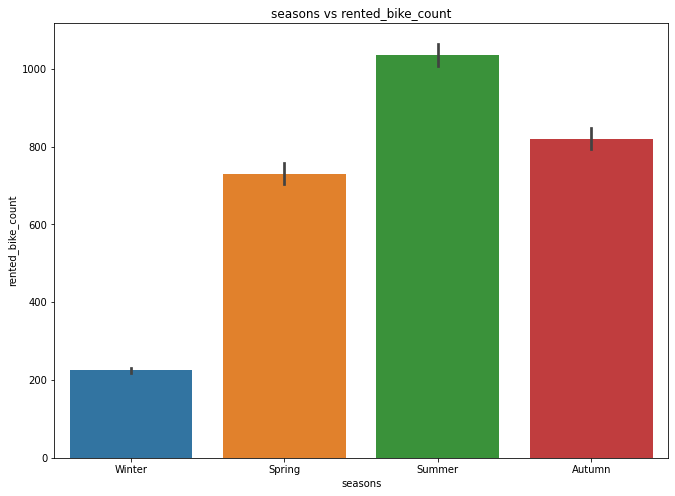

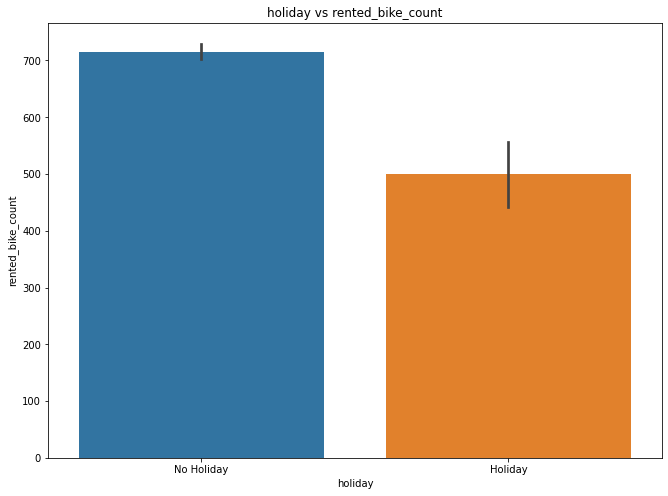

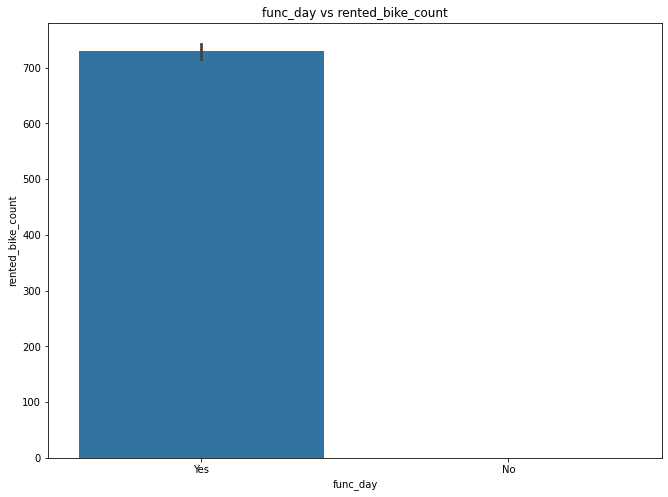

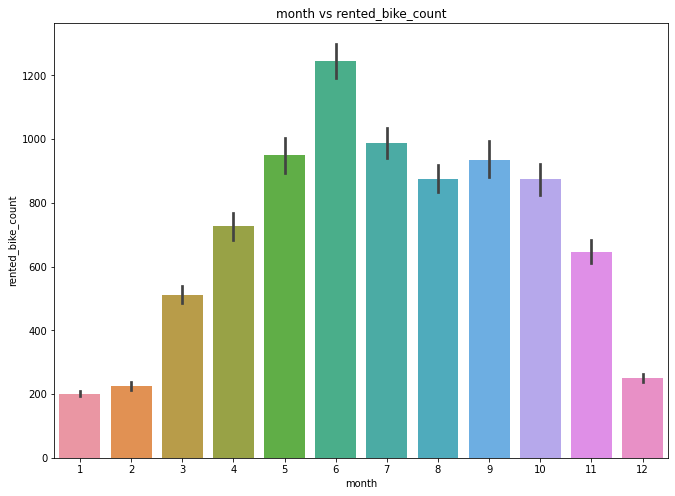

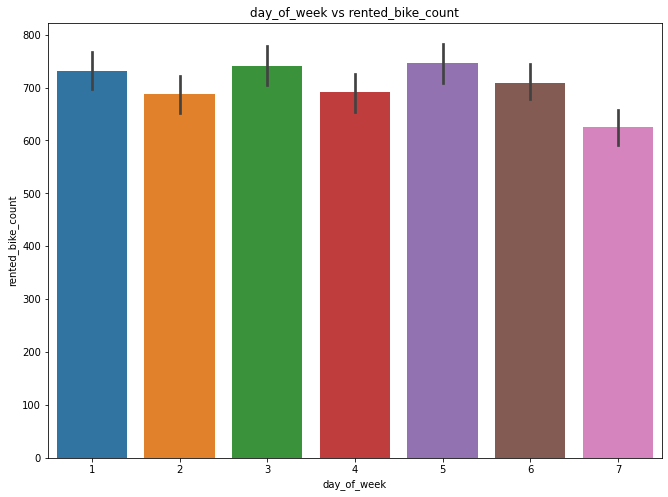

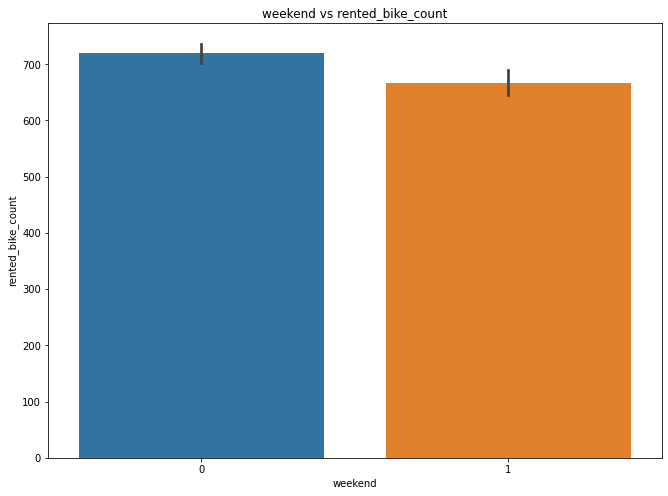

In [ ]:
# Analyzing the relationship between the dependent variable and the categorical variables
for i in cat_var:
  plt.figure(figsize=(11,8))
  sns.barplot(x=i,y=dependent_variable[0],data=data_2)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

To show the distribution of the rented bike count with other categorical variables we used bar charts.

##### 2. What is/are the insight(s) found from the chart?

From above bar charts we got insights:

1. In hour vs rented bike chart there is high demand in the morning 8 o clock and evening 18 o clock
2. from season vs rented bike chart there is more demand in summer and less demand in winter.
3. There is high demand on working days.
4. from month chart we know that there is high demand in month of june.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insights are going to provide some positive business impact, beacause analysing the demand on the basis of categorical varible we got know that when demand for bike is more so we can focus more on that portion.

#### Chart - 5

Text(0.5, 1.0, 'Average bike rented per hour')

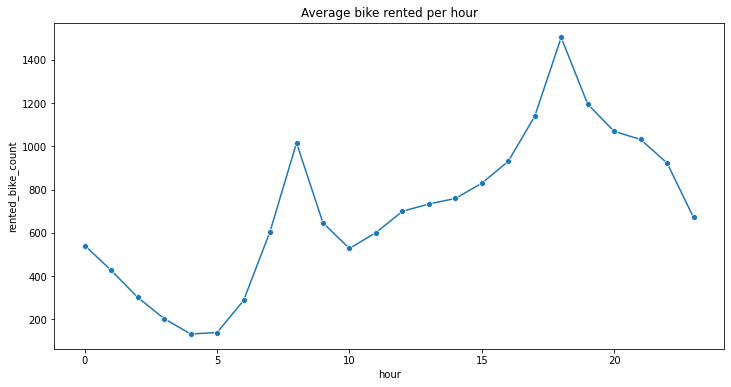

In [ ]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = data_2.groupby('hour')['rented_bike_count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(12,6))
sns.lineplot(data=avg_rent_hrs, marker='o')
plt.title('Average bike rented per hour')
# a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
# a.set_xticks(range(len(avg_rent_hrs)))
# a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how rented bike demand is distributed over 24 hours time we used line plot.

##### 2. What is/are the insight(s) found from the chart?

From above line plot we can clearly see that there is high demand in the morning and in the evening.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we know that there is high demand in morning and evening so business needs to focus more on that time slot. as well as try to meet the demand on that time slot.

#### Chart - 6 : Bike demand throughout the day (Multivariate)

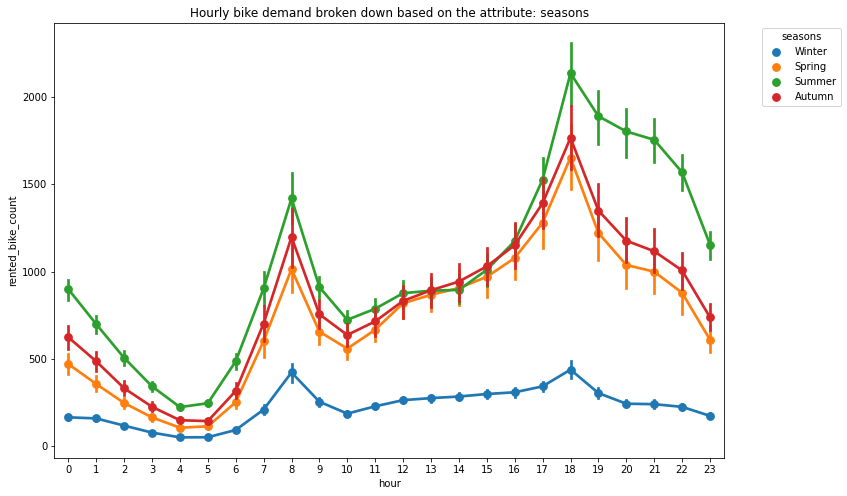

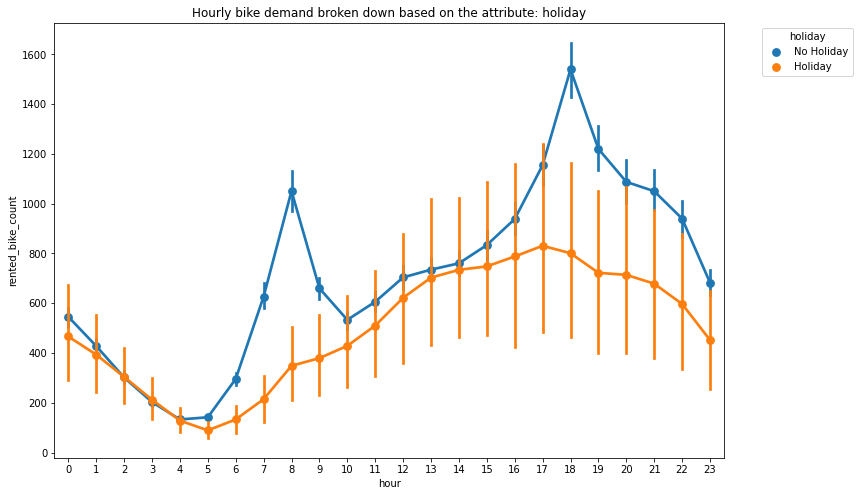

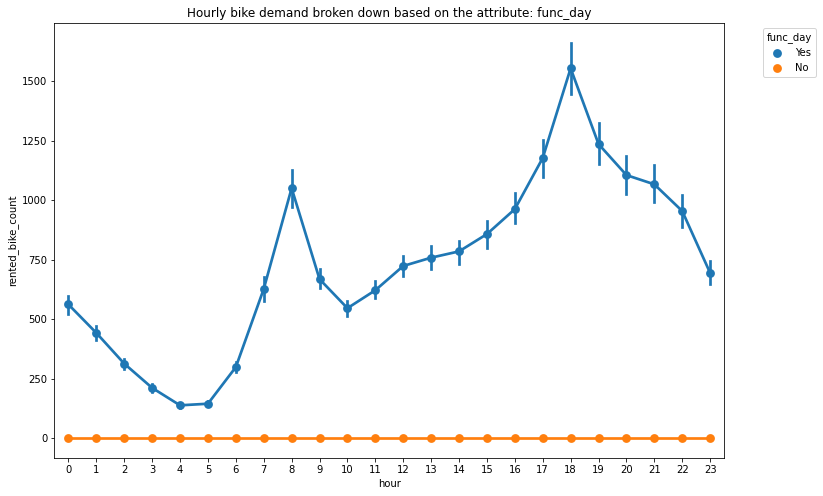

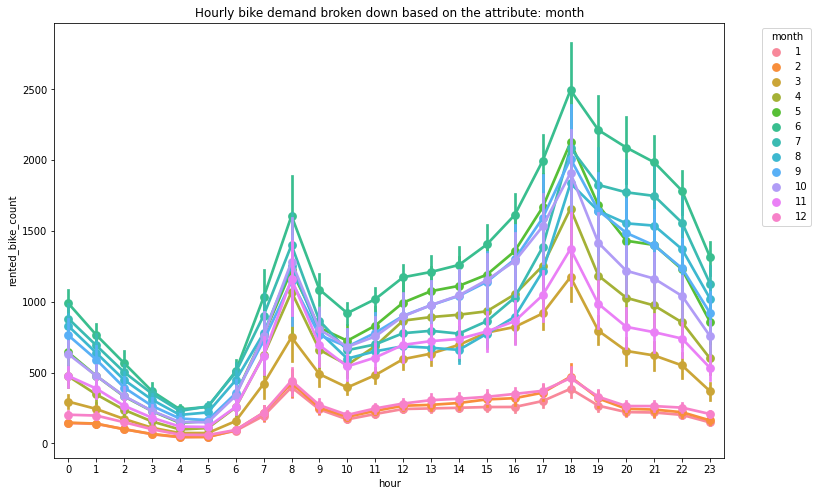

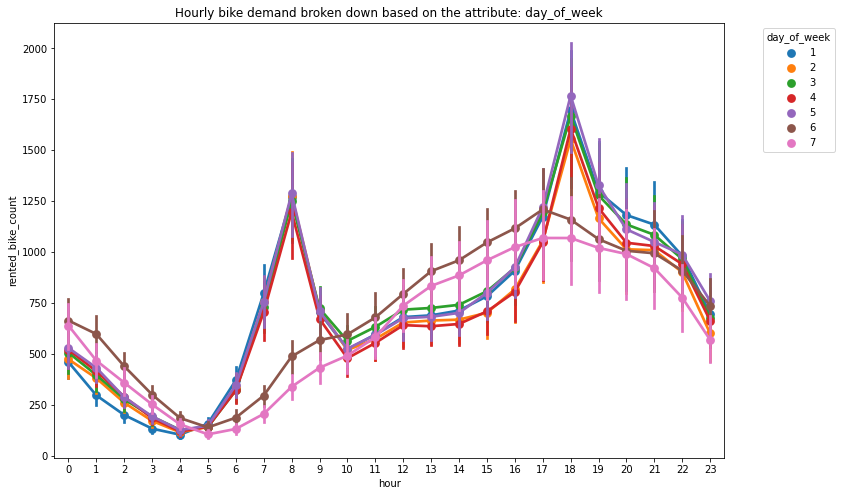

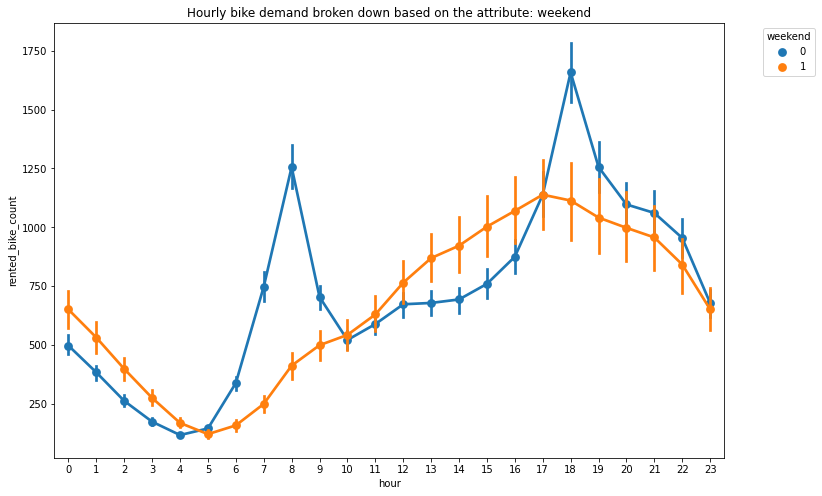

In [ ]:
# Chart - 6 visualization code
for i in cat_var:
  if i == 'hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(12,8))
    sns.pointplot(data=data_2, x='hour', y='rented_bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

##### 1. Why did you pick the specific chart?

A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To show the demand of rented bike throughout the day on the basis of other categorical variable we used line plot drawing multiple lines on charts. 

##### 2. What is/are the insight(s) found from the chart?

From above line plots we see that :

1. In winter season there is no significant demand even in the morning or in the evening.
2. On the functional day (i.e No Holiday) there is spike in morning and in evening, but that is not there on Holidays.
3. Around 3 months in winter season (i.e December, January & February) there is low demand.
4. On weekend almost throught the day there is demand.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, From this analysis we fugure out some key factors such as high demand in morning and evening slot in all the seasons.

#### Chart - 7

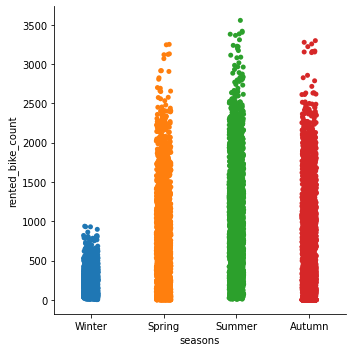

In [ ]:
#plot for rented bike count seasonly
sns.catplot(x='seasons',y='rented_bike_count',data=data_2)

##### 1. Why did you pick the specific chart?

catplot is used to create a categorical plot. Categorical plots are plots that are used to visualize the distribution of a categorical variable. They can be used to show how a variable is related to a categorical variable and can also be used to compare the distribution of multiple categorical variables.

To see the distribution of the rented bike on basis of season column we used catplot.

##### 2. What is/are the insight(s) found from the chart?

From above catplot we got know that:

1. there is low demand in winter 
2. Also in all seasons upto the 2500 bike counts distribution has seen dense.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from this catplot we know that there is high bike count upto the 2500 so, above that there maybe outliers present. business needs to evaluate that.

#### Chart - 8

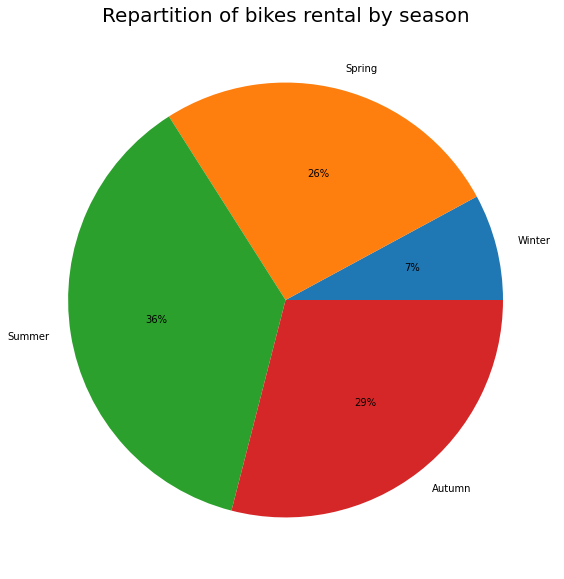

In [ ]:
# Chart - 8 visualization code
Winter=data_2[data_2["seasons"]=='Winter'].sum()
Spring=data_2[data_2["seasons"]=='Spring'].sum()
Summer=data_2[data_2["seasons"]=='Summer'].sum()
Autumn=data_2[data_2["seasons"]=='Autumn'].sum()

BikeSeasons={"Winter":Winter["rented_bike_count"],"Spring":Spring["rented_bike_count"],"Summer":Summer["rented_bike_count"],"Autumn":Autumn["rented_bike_count"]}
plt.gcf().set_size_inches(10,10)
plt.pie(BikeSeasons.values(),labels=BikeSeasons.keys(), autopct='%1d%%');
plt.title("Repartition of bikes rental by season", fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are generally used to show the proportions of a whole, and are especially useful for displaying data that has already been calculated as a percentage of the whole.

So, we used pie chart to see percentage distribution of rented bike on the basis of sseasons

##### 2. What is/are the insight(s) found from the chart?

From above pie chart:

1. In year data season summer contributes around 36% then autumn around 29% 
2. lowest demand in winter, it contributes around only 7% 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This insights only tell about percentage contribution of year data of season varible. which clearly gave indication about demand.

#### Chart - 14 - Correlation Heatmap

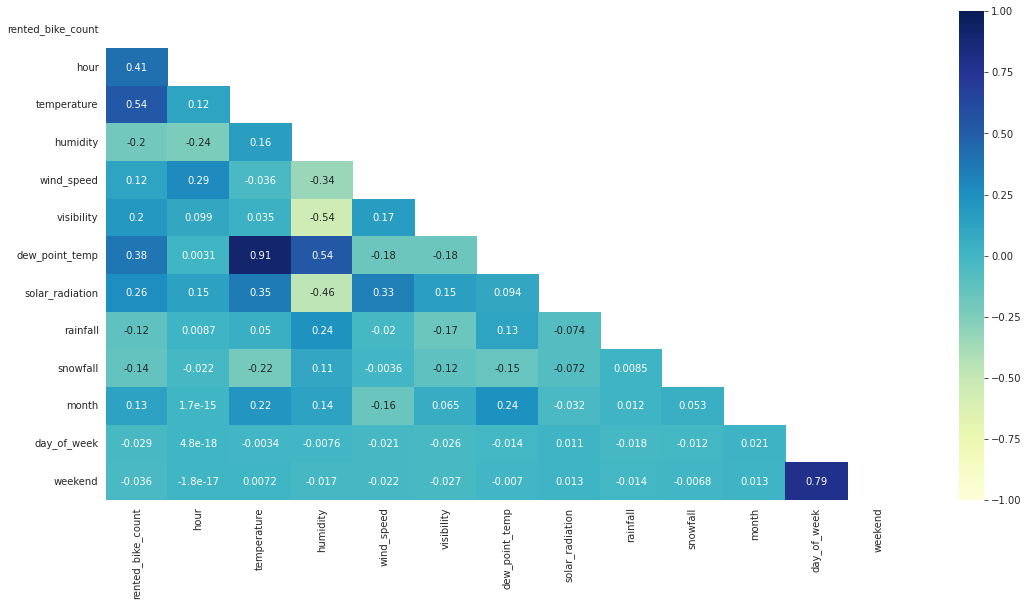

In [ ]:
# Correlation Heatmap visualization code
corr = data_2.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

##### 1. Why did you pick the specific chart?

The correlation coefficient is a measure of the strength and direction of a linear relationship between two variables. A correlation matrix is used to summarize the relationships among a set of variables and is an important tool for data exploration and for selecting which variables to include in a model. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, we have used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

From above correlation map we can clearly see that:

1. there is high multicolinearity between independent variable (i.e temperature & dew point temp, Humidity & dew point temp, weekend & day of week).
2. There is correlation of temperature, hour, dew point temp & solar radiation with dependent variable rented bike.
3. Other than that we didnt see any correlation.

#### Chart - 15 - Pair Plot 

In [ ]:
'''# Pair Plot
sns.pairplot(data_2)
plt.show()'''

'# Pair Plot\nsns.pairplot(data_2)\nplt.show()'

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

From above pair plot we got to know that, there is not clear linear relationship between variables. other than dew point temp, temperature & solar radiation there is not any reationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments we have noticed that our dependent variable does not seems to normally distributed so we have made hypothetical assumption that our data is normally distributed. and for that we have decided to do statistical analysis.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

## Normality test

for normality test we decided 
1. Null hypothesis : Data is normally distributed
2. Alternate hypothesis : Data is not normally distributed 


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import shapiro
test_data = data_2['rented_bike_count']

stats,p  = shapiro(test_data)
print('stats = %.2f, p=%.3f' % (stats,p))

if p <= 0.05:
  print("Reject null hypothesis i.e  Data is not normally distributed")
else:
  print('Accept null hypothesis i.e  Data is normally distributed')

stats = 0.88, p=0.000
Reject null hypothesis i.e  Data is not normally distributed


##### Which statistical test have you done to obtain P-Value?

We use Shapiro-wilk statistical test to obtain the p-value and we got very less p-value which is less than 0.05.

##### Why did you choose the specific statistical test?

Shapiro-wilk test is specially used to check whether the data is normally distributed or not. thats why we use this test and we got our result.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
'''# # Removing outliers by Using IQR method:
q1, q3, median = data_2.rented_bike_count.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
data_2['rented_bike_count'] = np.where(data_2['rented_bike_count'] > upper_limit, median,np.where(data_2['rented_bike_count'] < lower_limit,median,data_2['rented_bike_count']))

# # Removing outliers by Capping:
for col in ['wind_speed','solar_radiation','rainfall','snowfall']:
  upper_limit = data_2[col].quantile(0.99)
  data_2[col] = np.where(data_2[col] > upper_limit, upper_limit, data_2[col])'''

"# # Removing outliers by Using IQR method:\nq1, q3, median = data_2.rented_bike_count.quantile([0.25,0.75,0.5])\nlower_limit = q1 - 1.5*(q3-q1)\nupper_limit = q3 + 1.5*(q3-q1)\ndata_2['rented_bike_count'] = np.where(data_2['rented_bike_count'] > upper_limit, median,np.where(data_2['rented_bike_count'] < lower_limit,median,data_2['rented_bike_count']))\n\n# # Removing outliers by Capping:\nfor col in ['wind_speed','solar_radiation','rainfall','snowfall']:\n  upper_limit = data_2[col].quantile(0.99)\n  data_2[col] = np.where(data_2[col] > upper_limit, upper_limit, data_2[col])"

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here we use IQR method and Capping method, Based on IQR method we set Upper limit and Lower limit of rented bike count and convert those outliers into median values.

Also we capp outliers upto 99th percentile and above that we convert those outliers into upper limit value.

## Note :- 

1. We have tried to remove the outliers but it has seen that there is drop in performance after removing the outliers around 10% drop in model performnace 

So, we have decided that we will perform the model without removing the outliers.

### 3. Categorical Encoding

In [ ]:
# Converting snowfall and rainfall to categorical attributes
data_2['snowfall'] = data_2['snowfall'].apply(lambda x: 1 if x>0 else 0)
data_2['rainfall'] = data_2['rainfall'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
# encoding the visibility column
data_2['visibility'] = data_2['visibility'].apply(lambda x: 0 if 0<=x<=399 else (1 if 400<=x<=999 else 2))

In [ ]:
# encoding
data_2['func_day'] = np.where(data_2['func_day'] == 'Yes',1,0)
data_2['holiday'] = np.where(data_2['holiday'] == 'Holiday', 1,0)

In [ ]:
# one hot encoding
data_2 = pd.get_dummies(data_2, columns = ['hour', 'visibility', 'month', 'day_of_week' ])

In [ ]:
data_2.columns

Index(['date', 'rented_bike_count', 'temperature', 'humidity', 'wind_speed',
       'dew_point_temp', 'solar_radiation', 'rainfall', 'snowfall', 'seasons',
       'holiday', 'func_day', 'weekend', 'hour_0', 'hour_1', 'hour_2',
       'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9',
       'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15',
       'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21',
       'hour_22', 'hour_23', 'visibility_0', 'visibility_1', 'visibility_2',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4',
       'day_of_week_5', 'day_of_week_6', 'day_of_week_7'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

Since there are vaey few day on which there was snowfall / rainfall, it is in our interest that we convert these columns to binary categorical columns indicating whether there was rainfall / snowfall at that particular hour

For visibility
When

Visibility >= 20 Km ---> Clear (high visibility)
4 Km <= Visibility < 10 Km ---> Haze (medium visibility)
Visibility < 4 Km ---> Fog (low visibility)
Converting visibility based on the above mentioned threshold values. Since they are ordinal, we can encode them as 0 (low visibility), 1 (medium visibility), 2 (high visibility)

For func day and holiday
There are two categories whether its holiday or func day so we use 0 and 1 for that.

For Hour, Visisbility, month & day of the week 
we use here one hot encoding

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Text(0.5, 1.0, 'Temperature VS Dew point Temperature')

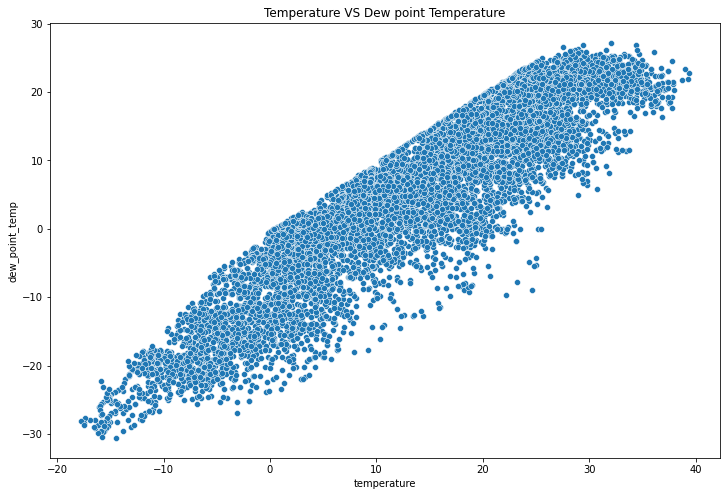

In [ ]:
# We see that the temperature and dew temperature are highly correlated

# Scatter plot to visualize the relationship between
# temperature and dew point temperature
plt.figure(figsize=(12,8))
sns.scatterplot(x='temperature',y='dew_point_temp',data=data_2)
plt.xlabel('temperature')
plt.ylabel('dew_point_temp')
plt.title('Temperature VS Dew point Temperature')

In [ ]:
# correlation
data_2[['temperature','dew_point_temp']].corr()

temperature  dew_point_temp
temperature        1.000000        0.912798
dew_point_temp     0.912798        1.000000

In [ ]:
# Creating new temperature column with 50% of both temp
data_2['temp'] = 0.5*data_2['temperature'] + 0.5*data_2['dew_point_temp']

#### 2. Feature Selection

In [ ]:
features = [i for i in data_2.columns if i not in ['rented_bike_count']]
features

['date',
 'temperature',
 'humidity',
 'wind_speed',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'seasons',
 'holiday',
 'func_day',
 'weekend',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'visibility_0',
 'visibility_1',
 'visibility_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_week_7',
 'temp']

In [ ]:
data_2[features]

date  temperature  humidity  wind_speed  dew_point_temp  \
0    2017-12-01         -5.2        37         2.2           -17.6   
1    2017-12-01         -5.5        38         0.8           -17.6   
2    2017-12-01         -6.0        39         1.0           -17.7   
3    2017-12-01         -6.2        40         0.9           -17.6   
4    2017-12-01         -6.0        36         2.3           -18.6   
...         ...          ...       ...         ...             ...   
8755 2018-11-30          4.2        34         2.6           -10.3   
8756 2018-11-30          3.4        37         2.3            -9.9   
8757 2018-11-30          2.6        39         0.3            -9.9   
8758 2018-11-30          2.1        41         1.0            -9.8   
8759 2018-11-30          1.9        43         1.3            -9.3   

      solar_radiation  rainfall  snowfall seasons  holiday  ...  month_11  \
0                 0.0         0         0  Winter        0  ...         0   
1                 0.0         0         0  Winter        0  ...         0   
2                 0.0         0         0  Winter        0  ...         0   
3                 0.0         0         0  Winter        0  ...         0   
4                 0.0         0         0  Winter        0  ...         0   
...               ...       ...       ...     ...      ...  ...       ...   
8755              0.0         0         0  Autumn        0  ...         1   
8756              0.0         0         0  Autumn        0  ...         1   
8757              0.0         0         0  Autumn        0  ...         1   
8758              0.0         0         0  Autumn        0  ...         1   
8759              0.0         0         0  Autumn        0  ...         1   

      month_12  day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
0            1              0              0              0              0   
1            1              0              0              0              0   
2            1              0              0              0              0   
3            1              0              0              0              0   
4            1              0              0              0              0   
...        ...            ...            ...            ...            ...   
8755         0              0              0              0              0   
8756         0              0              0              0              0   
8757         0              0              0              0              0   
8758         0              0              0              0              0   
8759         0              0              0              0              0   

      day_of_week_5  day_of_week_6  day_of_week_7   temp  
0                 1              0              0 -11.40  
1                 1              0              0 -11.55  
2                 1              0              0 -11.85  
3                 1              0              0 -11.90  
4                 1              0              0 -12.30  
...             ...            ...            ...    ...  
8755              1              0              0  -3.05  
8756              1              0              0  -3.25  
8757              1              0              0  -3.65  
8758              1              0              0  -3.85  
8759              1              0              0  -3.70  

[8760 rows x 59 columns]

In [ ]:
#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
continuous_variables = ['temperature', 'humidity', 'wind_speed', 'dew_point_temp', 'solar_radiation', 'temp']

In [ ]:
continuous_feature_df = pd.DataFrame(data_2[continuous_variables])

In [ ]:
continuous_feature_df

temperature  humidity  wind_speed  dew_point_temp  solar_radiation  \
0            -5.2        37         2.2           -17.6              0.0   
1            -5.5        38         0.8           -17.6              0.0   
2            -6.0        39         1.0           -17.7              0.0   
3            -6.2        40         0.9           -17.6              0.0   
4            -6.0        36         2.3           -18.6              0.0   
...           ...       ...         ...             ...              ...   
8755          4.2        34         2.6           -10.3              0.0   
8756          3.4        37         2.3            -9.9              0.0   
8757          2.6        39         0.3            -9.9              0.0   
8758          2.1        41         1.0            -9.8              0.0   
8759          1.9        43         1.3            -9.3              0.0   

       temp  
0    -11.40  
1    -11.55  
2    -11.85  
3    -11.90  
4    -12.30  
...     ...  
8755  -3.05  
8756  -3.25  
8757  -3.65  
8758  -3.85  
8759  -3.70  

[8760 rows x 6 columns]

In [ ]:
calc_vif(data_2[[i for i in continuous_feature_df]])

variables       VIF
0      temperature       inf
1         humidity  3.728151
2       wind_speed  4.486642
3   dew_point_temp       inf
4  solar_radiation  2.619125
5             temp       inf

In [ ]:
# Removing Temperature and dew point temperature
calc_vif(data_2[[i for i in continuous_feature_df if i not in ['dew_point_temp','temperature']]])

variables       VIF
0         humidity  3.539282
1       wind_speed  3.479585
2  solar_radiation  1.956713
3             temp  2.027904

In [ ]:
# dropping data, weekend, temperature and dew_point_temperature
data_2.drop(['date','weekend', 'dew_point_temp', 'temperature','seasons'],axis=1, inplace=True)

In [ ]:
# This is the final data for modeling
data_2.head()

rented_bike_count  humidity  wind_speed  solar_radiation  rainfall  \
0                254        37         2.2              0.0         0   
1                204        38         0.8              0.0         0   
2                173        39         1.0              0.0         0   
3                107        40         0.9              0.0         0   
4                 78        36         2.3              0.0         0   

   snowfall  holiday  func_day  hour_0  hour_1  ...  month_11  month_12  \
0         0        0         1       1       0  ...         0         1   
1         0        0         1       0       1  ...         0         1   
2         0        0         1       0       0  ...         0         1   
3         0        0         1       0       0  ...         0         1   
4         0        0         1       0       0  ...         0         1   

   day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  day_of_week_5  \
0              0              0              0              0              1   
1              0              0              0              0              1   
2              0              0              0              0              1   
3              0              0              0              0              1   
4              0              0              0              0              1   

   day_of_week_6  day_of_week_7   temp  
0              0              0 -11.40  
1              0              0 -11.55  
2              0              0 -11.85  
3              0              0 -11.90  
4              0              0 -12.30  

[5 rows x 55 columns]

##### What all feature selection methods have you used  and why?

We have used pearson correlation coefficient to check correlation between variables and also with dependent variable 

And also we check the multicolinearity using VIF and remove those who are having high VIF value.

##### Which all features you found important and why?

From above methods we have found that there is high correlation between temperature and dew point temperature So, we take 50 % of the both and create new variable temp by adding both of them.

using VIF we remove those temperaure and dew point temperature

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

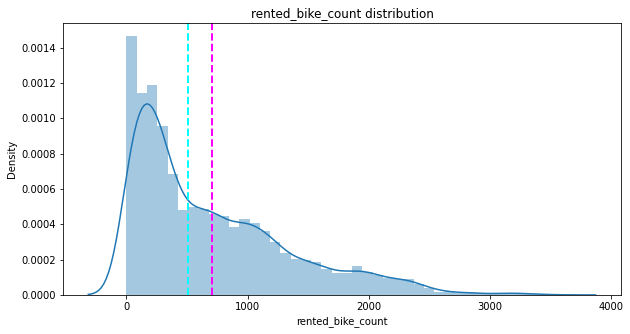

In [ ]:
# Transform Your data
# visualizing the distribution of the dependent variable - rental bike count
plt.figure(figsize=(10,5))
sns.distplot(data_2[dependent_variable])
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(data_2[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(data_2[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
# skew of the dependent variable
data_2[dependent_variable].skew()

rented_bike_count    1.153428
dtype: float64

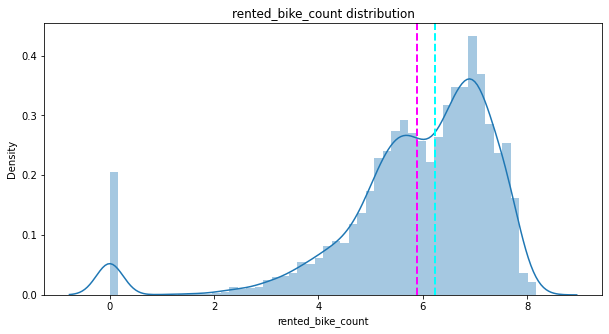

In [ ]:
# visualizing the distribution of dependent variable after log transformation
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(data_2[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.log1p(data_2['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(data_2['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
# skew of the dependent variable after log transformation
np.log1p(data_2[dependent_variable]).skew()

rented_bike_count   -1.832199
dtype: float64

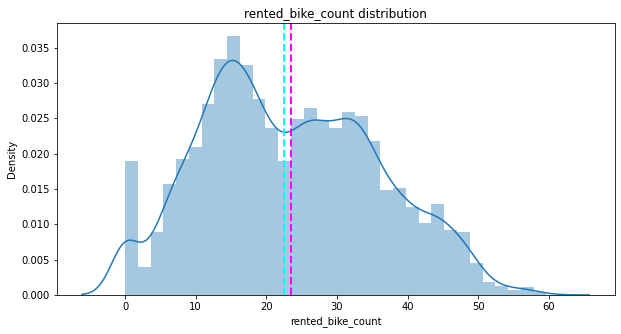

In [ ]:
# visualizing the distribution of dependent variable after sqrt transformation
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(data_2[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.sqrt(data_2['rented_bike_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(data_2['rented_bike_count']).median(), color='cyan', linestyle='dashed', linewidth=2)

In [ ]:
# # skew of the dependent variable after sqrt transformation
np.sqrt(data_2[dependent_variable]).skew()

rented_bike_count    0.237362
dtype: float64

In [ ]:
# Defining dependent and independent variables
X = data_2.drop('rented_bike_count',axis=1)
y = np.sqrt(data_2[dependent_variable])

In [ ]:
X

humidity  wind_speed  solar_radiation  rainfall  snowfall  holiday  \
0           37         2.2              0.0         0         0        0   
1           38         0.8              0.0         0         0        0   
2           39         1.0              0.0         0         0        0   
3           40         0.9              0.0         0         0        0   
4           36         2.3              0.0         0         0        0   
...        ...         ...              ...       ...       ...      ...   
8755        34         2.6              0.0         0         0        0   
8756        37         2.3              0.0         0         0        0   
8757        39         0.3              0.0         0         0        0   
8758        41         1.0              0.0         0         0        0   
8759        43         1.3              0.0         0         0        0   

      func_day  hour_0  hour_1  hour_2  ...  month_11  month_12  \
0            1       1       0       0  ...         0         1   
1            1       0       1       0  ...         0         1   
2            1       0       0       1  ...         0         1   
3            1       0       0       0  ...         0         1   
4            1       0       0       0  ...         0         1   
...        ...     ...     ...     ...  ...       ...       ...   
8755         1       0       0       0  ...         1         0   
8756         1       0       0       0  ...         1         0   
8757         1       0       0       0  ...         1         0   
8758         1       0       0       0  ...         1         0   
8759         1       0       0       0  ...         1         0   

      day_of_week_1  day_of_week_2  day_of_week_3  day_of_week_4  \
0                 0              0              0              0   
1                 0              0              0              0   
2                 0              0              0              0   
3                 0              0              0              0   
4                 0              0              0              0   
...             ...            ...            ...            ...   
8755              0              0              0              0   
8756              0              0              0              0   
8757              0              0              0              0   
8758              0              0              0              0   
8759              0              0              0              0   

      day_of_week_5  day_of_week_6  day_of_week_7   temp  
0                 1              0              0 -11.40  
1                 1              0              0 -11.55  
2                 1              0              0 -11.85  
3                 1              0              0 -11.90  
4                 1              0              0 -12.30  
...             ...            ...            ...    ...  
8755              1              0              0  -3.05  
8756              1              0              0  -3.25  
8757              1              0              0  -3.65  
8758              1              0              0  -3.85  
8759              1              0              0  -3.70  

[8760 rows x 54 columns]

In [ ]:
features

['date',
 'temperature',
 'humidity',
 'wind_speed',
 'dew_point_temp',
 'solar_radiation',
 'rainfall',
 'snowfall',
 'seasons',
 'holiday',
 'func_day',
 'weekend',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'visibility_0',
 'visibility_1',
 'visibility_2',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'day_of_week_7',
 'temp']

###  We plot distribution plot and we have found that our data is not normally distributed it needs transformation.

So, first we have calculate the skewness value and we have found that rented bike attribute is positively skewed so we used log transfomation but it affected negatively 

So, we finally used squareroot transformation & now our data looks normally distrubuted & skewness also reduced.

### 6. Data Scaling

In [ ]:
features = [i for i in data_2.columns if i not in ['rented_bike_count']]

In [ ]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(data_2[features])

##### Which method have you used to scale you data and why?

In this we have different independent features of diffent scale so we have used standard scalar method to scale our independent features into one scale.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

##### What data splitting ratio have you used and why? 

To train the model we have split the data into train and test using train_test_split method 

we have split 80% of our data into train and 20% into test.

## ***7. ML Model Implementation***

In [ ]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 20 important features, and returns a list of the model scores'''

  # Squring the y test and and pred as we have used sqrt transformation
  y_t = np.square(y_test)
  y_p = np.square(y_pred)
  y_train2 = np.square(y_train)
  y_train_pred = np.square(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  mae=mean_absolute_error(y_t,y_p)
  rmse = np.sqrt(mse)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))
  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values 
  plt.figure(figsize=(18,6))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Count', fontsize=18)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances


  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(12,8))
  plt.title('Feature Importances (top 20) for '+str(model), fontsize = 18)
  plt.xlabel('Relative Importance')
  feat.nlargest(20).plot(kind='barh')


  model_score = [mse,mae,rmse,r2_train,r2,r2_adjusted]
  return model_score

In [ ]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE','MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

### ML Model - 1 : Linear Regression

In [ ]:
# Import the LinearRegression class
reg = LinearRegression()

# Initialize an instance of the class
reg.fit(X_train, y_train)

# Fit the linear regression model to your training data
y_pred_li = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 88314.41313273119
RMSE : 297.1774101992465
MAE : 201.76220379658145
Train R2 : 0.7835898165017434
Test R2 : 0.7889853126951051
Adjusted R2 :  0.7822706438003117


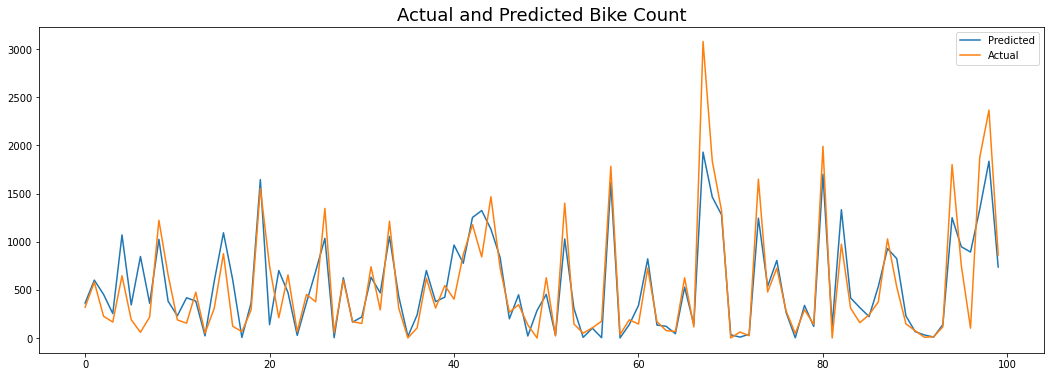

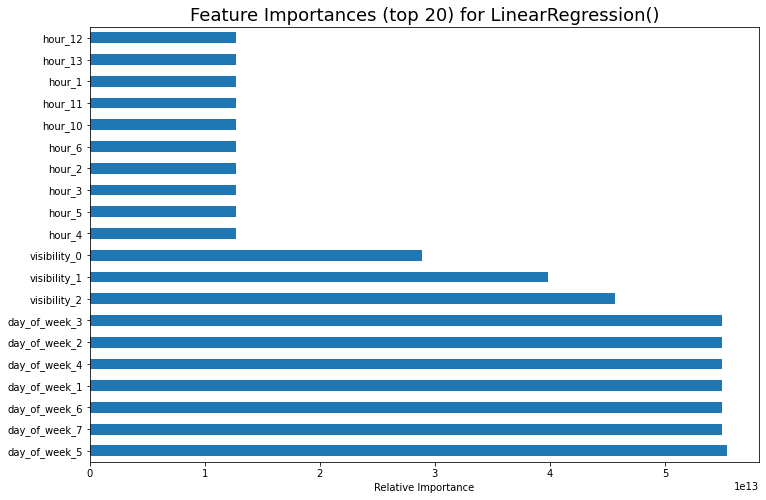

In [ ]:
linear_score = evaluate_model(reg, y_test,y_pred_li)
# Evaluation Metric Score chart
score['Linear regression'] = linear_score

In [ ]:
score

Linear regression
MSE               88314.413133
RMSE                201.762204
MAE                 297.177410
Train R2              0.783590
Test R2               0.788985
Adjusted R2           0.782271

So, using linear regression model we have got accuracy(i.e R2 score) around 70% on train data and same 70% on test data. Which seems to low to predict on unseen data, so we have decided to tune our model. 

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'normalize': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'normalize': [True, False]}, return_train_score=True,
             scoring='r2')

In [ ]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'normalize': True}
Best R2 score:  0.8031484791994133


In [ ]:
# use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression(normalize=True)

In [ ]:
# predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 88326.66565119979
RMSE : 297.1980243056804
MAE : 201.69766297961291
Train R2 : 0.7835700840079604
Test R2 : 0.7889560370507155
Adjusted R2 :  0.7822404365797306


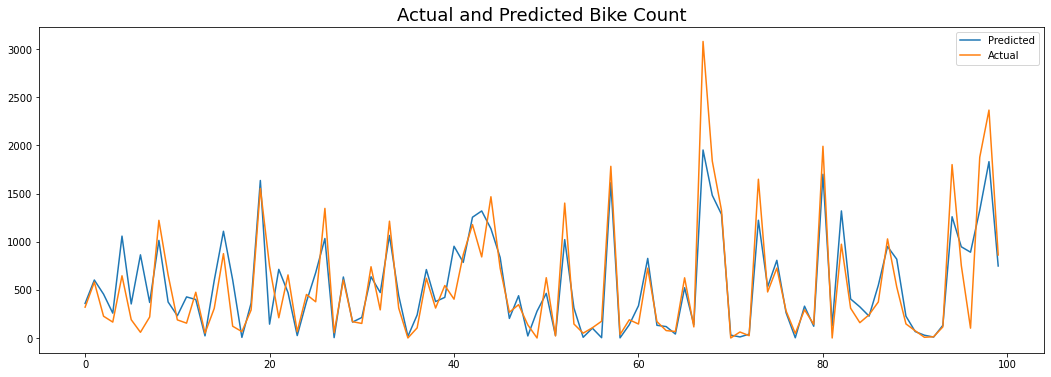

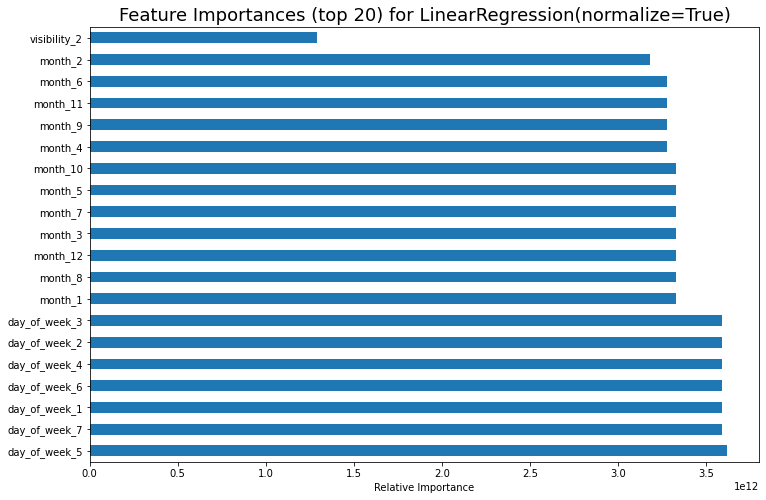

In [ ]:
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [ ]:
score['Linear regression tuned'] = linear_score2
score

Linear regression  Linear regression tuned
MSE               88314.413133             88326.665651
RMSE                201.762204               201.697663
MAE                 297.177410               297.198024
Train R2              0.783590                 0.783570
Test R2               0.788985                 0.788956
Adjusted R2           0.782271                 0.782240

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using GridSearchCV it has seen that there is no improvment in the model. there is no change in train R2 score.

So, we have decided to move ahead with next regression model.

### ML Model - 2 : Lasso Regression

In [ ]:
# Import the Lasso Regression class
lasso = Lasso()

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lasso1 = lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 199251.13943499743
RMSE : 446.37555873389556
MAE : 303.758212165632
Train R2 : 0.5201240107717402
Test R2 : 0.5239178363804666
Adjusted R2 :  0.5087684923407172


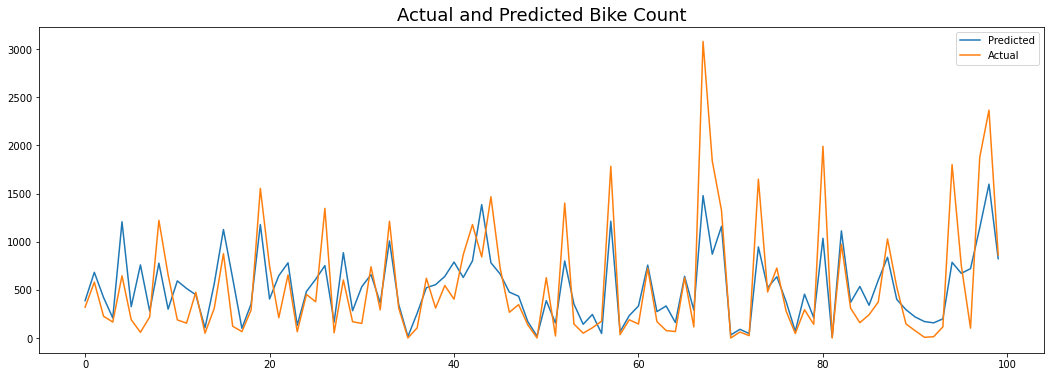

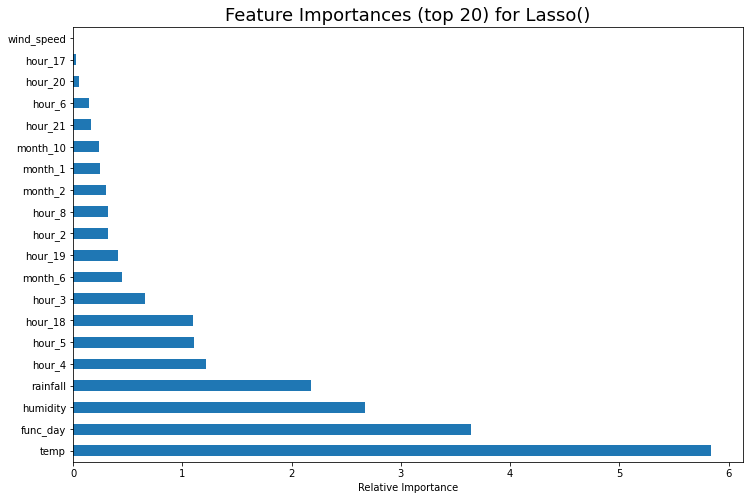

In [ ]:
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression
MSE               88314.413133             88326.665651     199251.139435
RMSE                201.762204               201.697663        303.758212
MAE                 297.177410               297.198024        446.375559
Train R2              0.783590                 0.783570          0.520124
Test R2               0.788985                 0.788956          0.523918
Adjusted R2           0.782271                 0.782240          0.508768

It Has seen that using Lasso regression analysis the performance of the model has drop down. so we will try to tuned the model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
#import Lasso regressor and grid search cv
lasso = Lasso()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -30.34188545869439


In [ ]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Initialize an instance of the class
lasso.fit(X_train, y_train)

# Fit the lasso regression model to your training data
y_pred_lassocv = lasso.predict(X_test)

MSE : 88358.33989461442
RMSE : 297.25130764155506
MAE : 201.70425481228804
Train R2 : 0.7834759534324424
Test R2 : 0.7888803559661375
Adjusted R2 :  0.7821623472579298


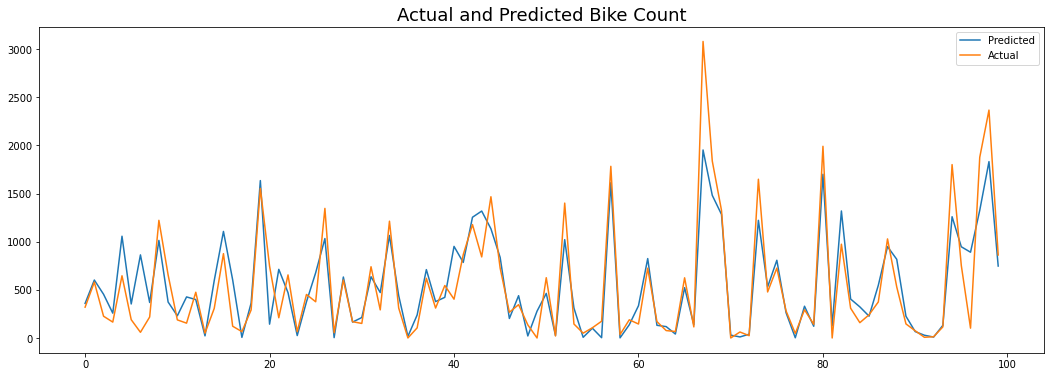

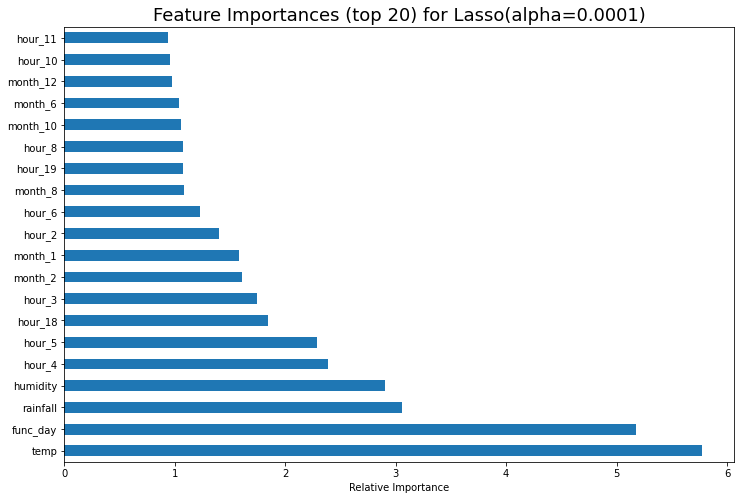

In [ ]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88314.413133             88326.665651     199251.139435   
RMSE                201.762204               201.697663        303.758212   
MAE                 297.177410               297.198024        446.375559   
Train R2              0.783590                 0.783570          0.520124   
Test R2               0.788985                 0.788956          0.523918   
Adjusted R2           0.782271                 0.782240          0.508768   

             Lasso with alpha = 0.0001  
MSE                       88358.339895  
RMSE                        201.704255  
MAE                         297.251308  
Train R2                      0.783476  
Test R2                       0.788880  
Adjusted R2                   0.782162

After tuning we have seen that there is increse in performance from 52% to 78%

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

RMSE & MSE are measuring the average squared values between the predicted and actual values. 

Whereas R2 score is a measure how well the model fits the data.

In a business context, a low RMSE and high R2 score would indicate that the model is making accurate predictions and is a good fit for the data. This would be desirable for a business because it would mean that the model is able to provide useful insights and make accurate predictions about future outcomes.

### ML Model - 3 : Ridge Regression

In [ ]:
# Ridge regressor class
ridge = Ridge()

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 88365.68734453894
RMSE : 297.26366637135277
MAE : 201.717161005283
Train R2 : 0.7834601310784806
Test R2 : 0.788862800283058
Adjusted R2 :  0.7821442329379108


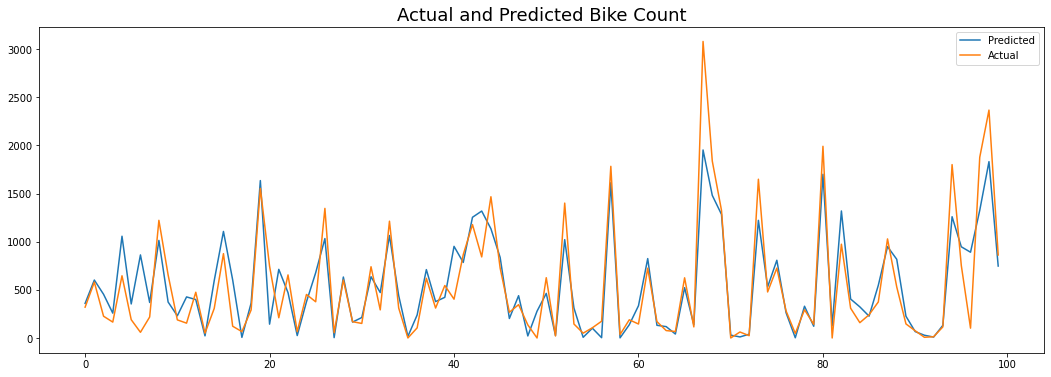

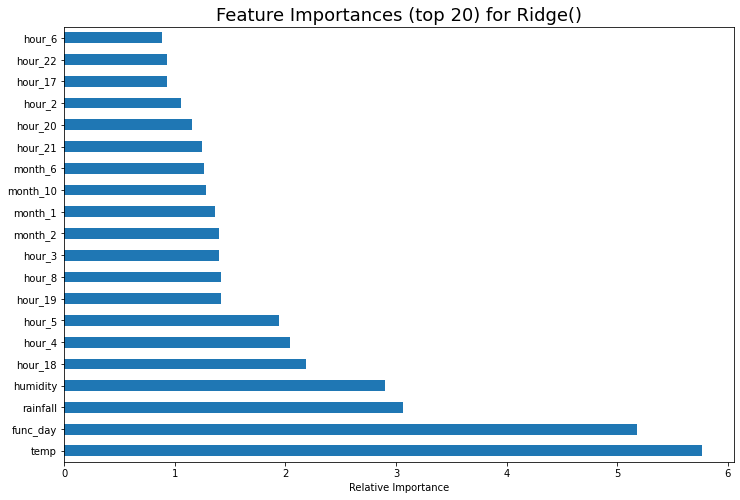

In [ ]:
# Evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88314.413133             88326.665651     199251.139435   
RMSE                201.762204               201.697663        303.758212   
MAE                 297.177410               297.198024        446.375559   
Train R2              0.783590                 0.783570          0.520124   
Test R2               0.788985                 0.788956          0.523918   
Adjusted R2           0.782271                 0.782240          0.508768   

             Lasso with alpha = 0.0001         Ridge  
MSE                       88358.339895  88365.687345  
RMSE                        201.704255    201.717161  
MAE                         297.251308    297.263666  
Train R2                      0.783476      0.783460  
Test R2                       0.788880      0.788863  
Adjusted R2                   0.782162      0.782144

We have used Ridge regression technique to check the performance of the model and we have found that there is no significant difference in between linear regression and Ridge. 

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Import Ridge regressor Class
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
#fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
#getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -30.341486749976816


In [ ]:
# Initiate ridge with best alpha  
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

#prediction for Ridge regression
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

MSE : 88416.8481748051
RMSE : 297.34970686853734
MAE : 201.78332256985254
Train R2 : 0.7833529276131157
Test R2 : 0.7887405587800244
Adjusted R2 :  0.7820181016050811


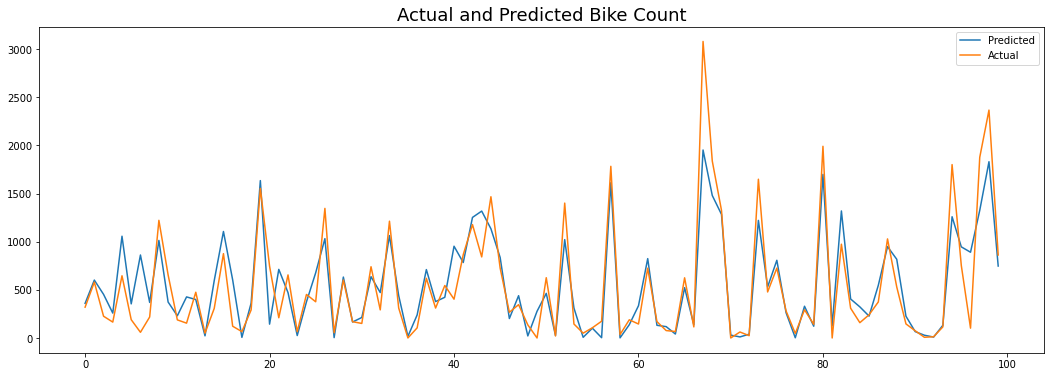

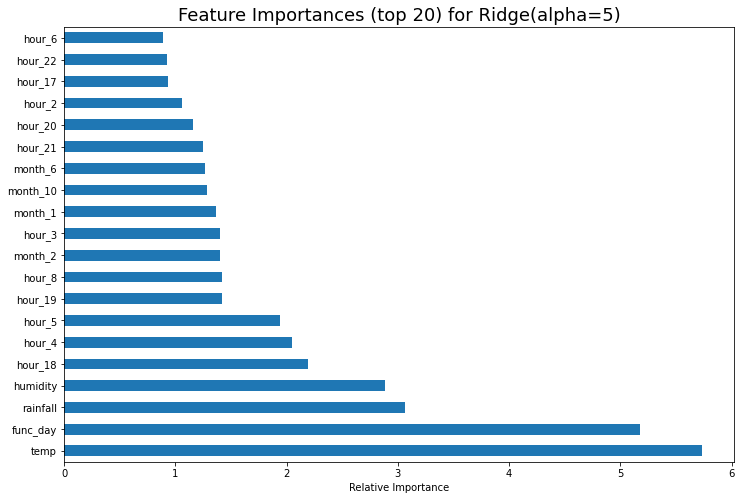

In [ ]:
#Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88314.413133             88326.665651     199251.139435   
RMSE                201.762204               201.697663        303.758212   
MAE                 297.177410               297.198024        446.375559   
Train R2              0.783590                 0.783570          0.520124   
Test R2               0.788985                 0.788956          0.523918   
Adjusted R2           0.782271                 0.782240          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  
MSE                       88358.339895  88365.687345          88416.848175  
RMSE                        201.704255    201.717161            201.783323  
MAE                         297.251308    297.263666            297.349707  
Train R2                      0.783476      0.783460              0.783353  
Test R2                       0.788880      0.788863              0.788741  
Adjusted R2                   0.782162      0.782144              0.782018

We have tuned Ridge regression using hyperparametric technique & check the performance of the model and we have found that there is no significant difference in between tuned and without tuned.

It performs well only when there is multicolinearity or overfitting situation is present in our case we have already handle the multicolinearity situation. thats why it is not showing any difference in performance.

### ML Model - 4 : Decision Tree

In [ ]:
# ML Model - 3 Implementation
dt = DecisionTreeRegressor(random_state=1)
# Fit the Algorithm
dt.fit(X_train,y_train)
# Predict on the model
y_pred_dt1 = dt.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 73491.68150684932
RMSE : 271.09349218830266
MAE : 152.0673515981735
Train R2 : 1.0
Test R2 : 0.824402114642698
Adjusted R2 :  0.8188144388564315


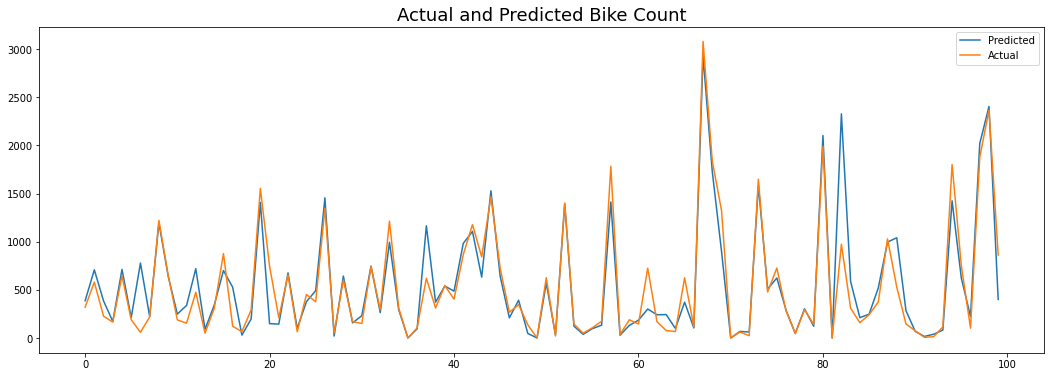

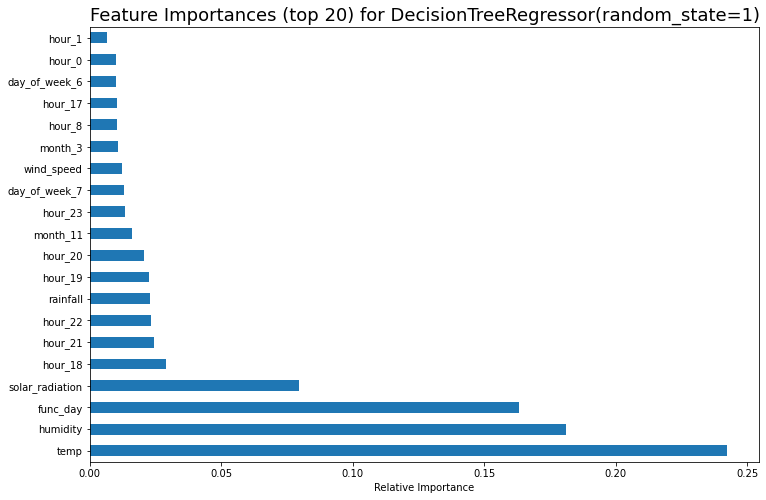

In [ ]:
# Evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88314.413133             88326.665651     199251.139435   
RMSE                201.762204               201.697663        303.758212   
MAE                 297.177410               297.198024        446.375559   
Train R2              0.783590                 0.783570          0.520124   
Test R2               0.788985                 0.788956          0.523918   
Adjusted R2           0.782271                 0.782240          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88358.339895  88365.687345          88416.848175   
RMSE                        201.704255    201.717161            201.783323   
MAE                         297.251308    297.263666            297.349707   
Train R2                      0.783476      0.783460              0.783353   
Test R2                       0.788880      0.788863              0.788741   
Adjusted R2                   0.782162      0.782144              0.782018   

             Decision tree  
MSE           73491.681507  
RMSE            152.067352  
MAE             271.093492  
Train R2          1.000000  
Test R2           0.824402  
Adjusted R2       0.818814

From the decision tree algorithm we got train R2 score is 1 and test R2 score is 82% which shows the overffitting condition on train dataset.

So, we have decided to tune our data using GridSearchCV.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# HYperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [ ]:
dt_best_params

{'max_depth': 16, 'min_samples_leaf': 22, 'min_samples_split': 35}

In [ ]:
# building DT model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [ ]:
# fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=16, min_samples_leaf=22, min_samples_split=35,
                      random_state=1)

In [ ]:
# dt test predictions
y_pred_dt = dt_model.predict(X_test)

MSE : 89557.65707345174
RMSE : 299.2618536891258
MAE : 184.41649011155485
Train R2 : 0.8375934856837123
Test R2 : 0.7860147587154215
Adjusted R2 :  0.7792055642373029


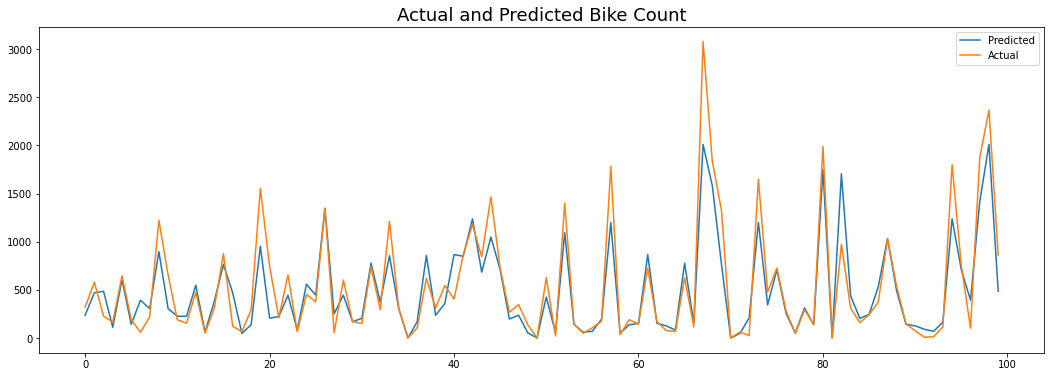

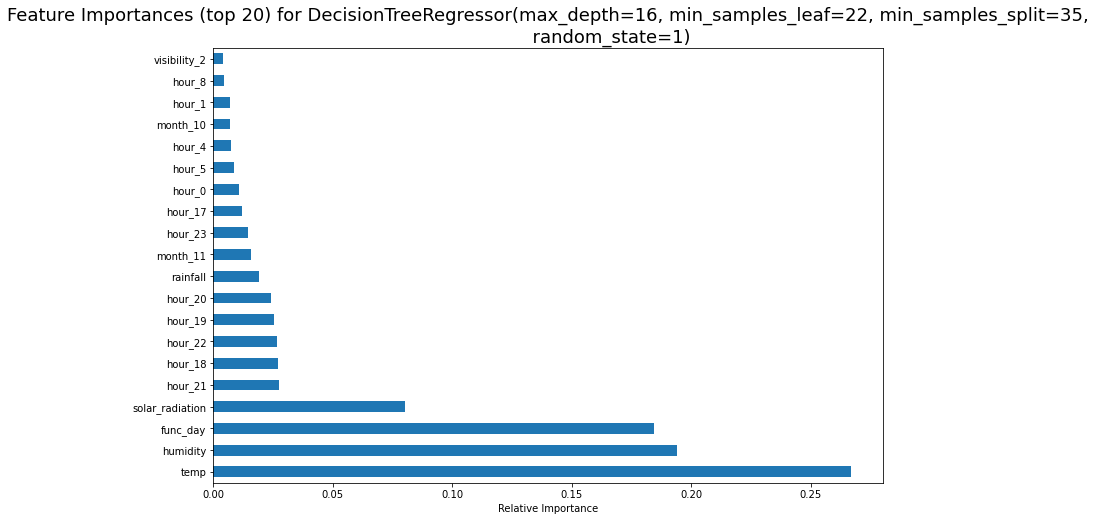

In [ ]:
#Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

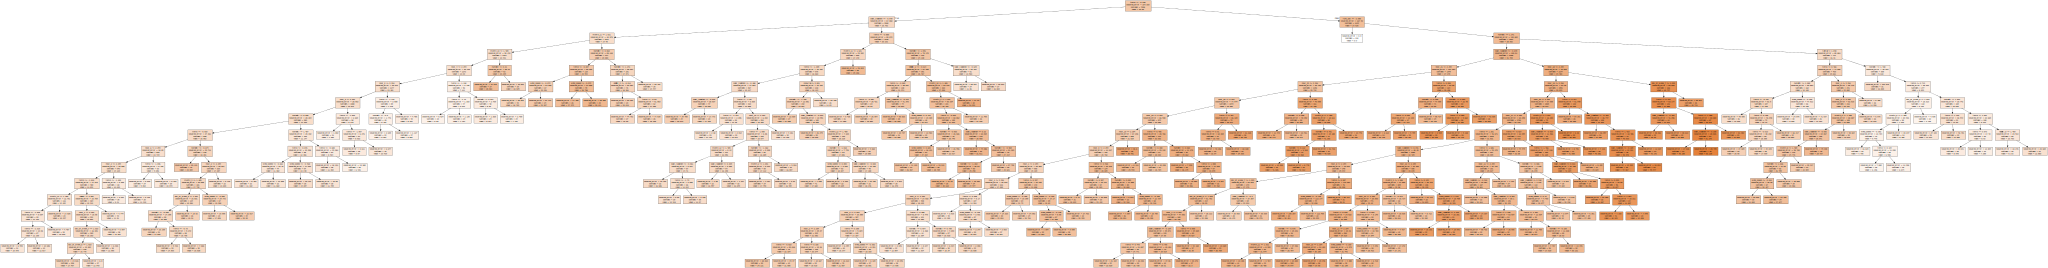

In [ ]:
# Decision tree diagram
graph = Source(tree.export_graphviz(dt_model,
                                    out_file=None,
                                    feature_names=features,
                                    filled= True))
display(SVG(graph.pipe(format='svg')))

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88314.413133             88326.665651     199251.139435   
RMSE                201.762204               201.697663        303.758212   
MAE                 297.177410               297.198024        446.375559   
Train R2              0.783590                 0.783570          0.520124   
Test R2               0.788985                 0.788956          0.523918   
Adjusted R2           0.782271                 0.782240          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88358.339895  88365.687345          88416.848175   
RMSE                        201.704255    201.717161            201.783323   
MAE                         297.251308    297.263666            297.349707   
Train R2                      0.783476      0.783460              0.783353   
Test R2                       0.788880      0.788863              0.788741   
Adjusted R2                   0.782162      0.782144              0.782018   

             Decision tree  Decision tree tuned  
MSE           73491.681507         89557.657073  
RMSE            152.067352           184.416490  
MAE             271.093492           299.261854  
Train R2          1.000000             0.837593  
Test R2           0.824402             0.786015  
Adjusted R2       0.818814             0.779206

From the above tuned Decision tree regression. It Has seen that earlier that we have faced overfitting condition. After tuning it there is no such condition and it looks like model performs with good accuracy around 83% on train and 78% on test data.

### ML Model - 5 : Random Forest

In [ ]:
# ML Model - 3 Implementation
rf = RandomForestRegressor(random_state=0)
# Fit the Algorithm
rf.fit(X_train,y_train)
# Predict on the model
y_pred_rf1 = rf.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 38747.939048529646
RMSE : 196.8449619587193
MAE : 112.34713100325216
Train R2 : 0.9881686099987611
Test R2 : 0.9074173291538947
Adjusted R2 :  0.9044712689148319


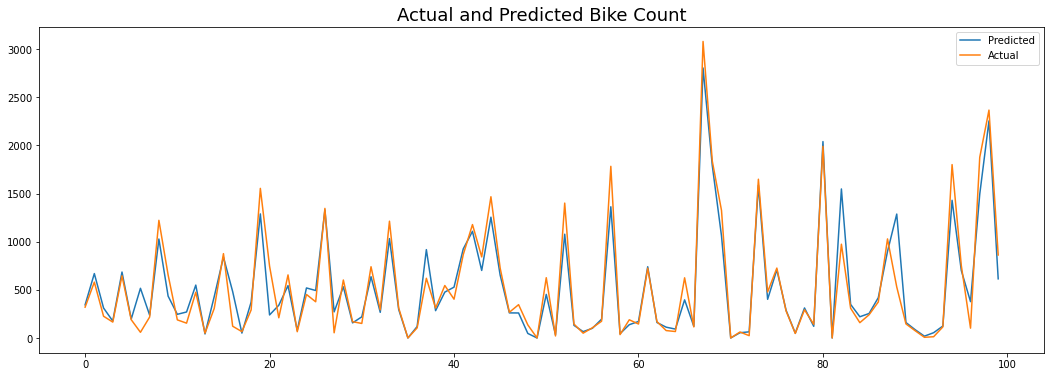

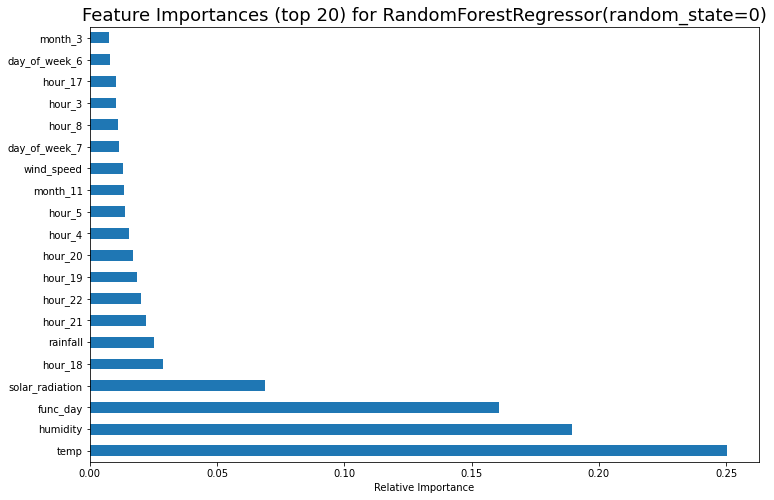

In [ ]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88314.413133             88326.665651     199251.139435   
RMSE                201.762204               201.697663        303.758212   
MAE                 297.177410               297.198024        446.375559   
Train R2              0.783590                 0.783570          0.520124   
Test R2               0.788985                 0.788956          0.523918   
Adjusted R2           0.782271                 0.782240          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88358.339895  88365.687345          88416.848175   
RMSE                        201.704255    201.717161            201.783323   
MAE                         297.251308    297.263666            297.349707   
Train R2                      0.783476      0.783460              0.783353   
Test R2                       0.788880      0.788863              0.788741   
Adjusted R2                   0.782162      0.782144              0.782018   

             Decision tree  Decision tree tuned  Random forest  
MSE           73491.681507         89557.657073   38747.939049  
RMSE            152.067352           184.416490     112.347131  
MAE             271.093492           299.261854     196.844962  
Train R2          1.000000             0.837593       0.988169  
Test R2           0.824402             0.786015       0.907417  
Adjusted R2       0.818814             0.779206       0.904471

Here we have seen that using random forest regression accuracy of the train and test model increases 98% and 90% respectively. which seems to be a good model for prediction.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [ ]:
# fitting a rf model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [ ]:
# best parameters for random forests
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [ ]:
# Fitting RF model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [ ]:
# fit
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [ ]:
# rf predictions on test data
y_pred_rf = rf_model.predict(X_test)

MSE : 75962.32375859405
RMSE : 275.6126335250147
MAE : 166.3139028404189
Train R2 : 0.8558829868398841
Test R2 : 0.8184988675542456
Adjusted R2 :  0.8127233453668145


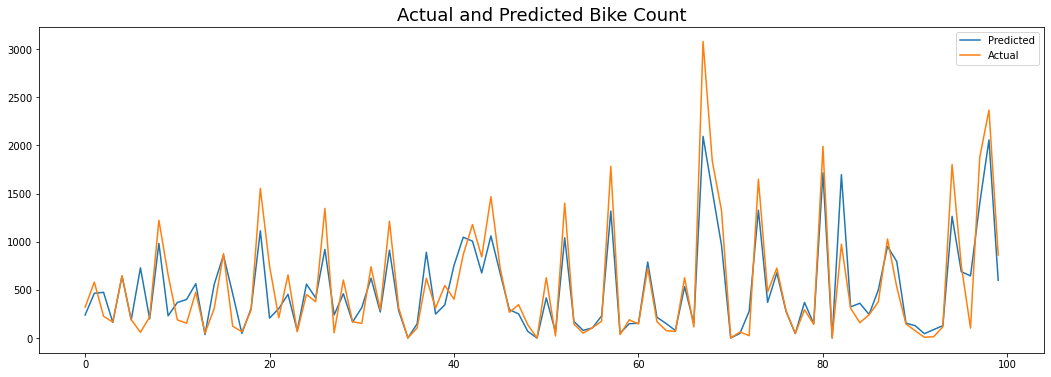

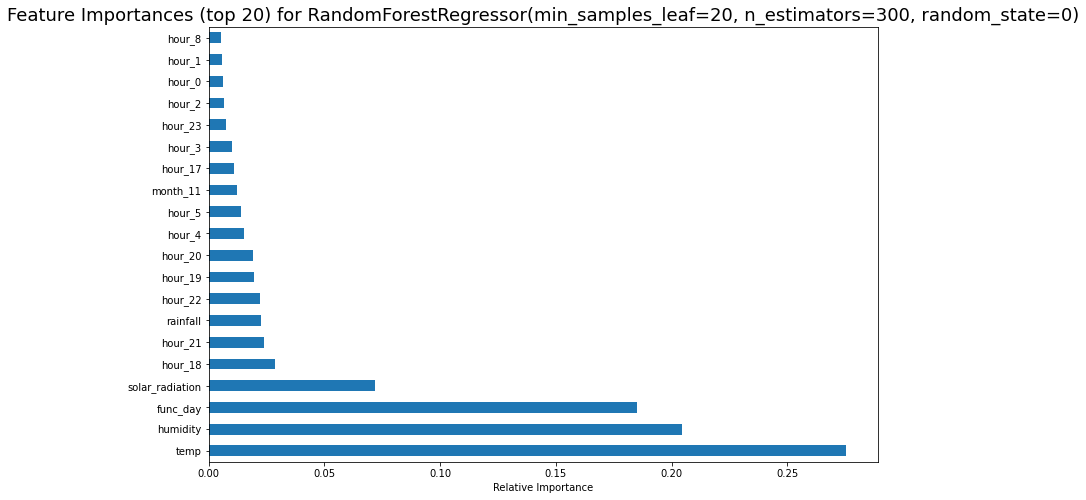

In [ ]:
#Evaluation matrices for RandomForest 
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88314.413133             88326.665651     199251.139435   
RMSE                201.762204               201.697663        303.758212   
MAE                 297.177410               297.198024        446.375559   
Train R2              0.783590                 0.783570          0.520124   
Test R2               0.788985                 0.788956          0.523918   
Adjusted R2           0.782271                 0.782240          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88358.339895  88365.687345          88416.848175   
RMSE                        201.704255    201.717161            201.783323   
MAE                         297.251308    297.263666            297.349707   
Train R2                      0.783476      0.783460              0.783353   
Test R2                       0.788880      0.788863              0.788741   
Adjusted R2                   0.782162      0.782144              0.782018   

             Decision tree  Decision tree tuned  Random forest  \
MSE           73491.681507         89557.657073   38747.939049   
RMSE            152.067352           184.416490     112.347131   
MAE             271.093492           299.261854     196.844962   
Train R2          1.000000             0.837593       0.988169   
Test R2           0.824402             0.786015       0.907417   
Adjusted R2       0.818814             0.779206       0.904471   

             Random forest tuned  
MSE                 75962.323759  
RMSE                  166.313903  
MAE                   275.612634  
Train R2                0.855883  
Test R2                 0.818499  
Adjusted R2             0.812723

After tuning the random forest algorithm it has seen that there is drop in performance both in train and test score so we are not going to use this model.

### ML Model - 6 : Gradient Boosting Regressor

In [ ]:
# ML Model - 3 Implementation
gb = GradientBoostingRegressor(random_state=0)
# Fit the Algorithm
gb.fit(X_train,y_train)
# Predict on the model
y_pred_gb1 = gb.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 77975.24920161186
RMSE : 279.2404863224741
MAE : 186.13005739507054
Train R2 : 0.8258252767878081
Test R2 : 0.8136892694619378
Adjusted R2 :  0.8077607017253112


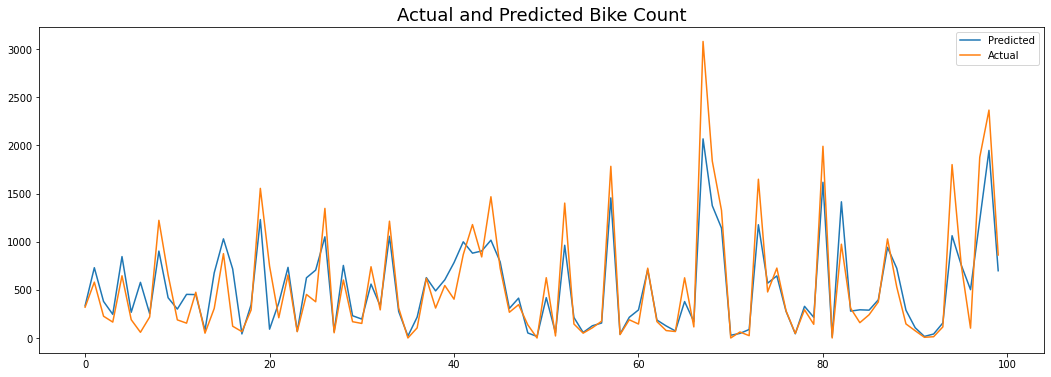

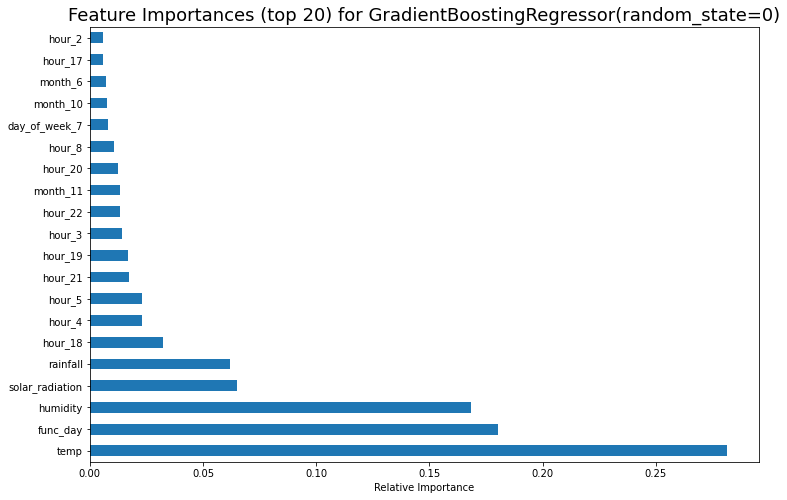

In [ ]:
# Evaluation Metric Score chart
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88314.413133             88326.665651     199251.139435   
RMSE                201.762204               201.697663        303.758212   
MAE                 297.177410               297.198024        446.375559   
Train R2              0.783590                 0.783570          0.520124   
Test R2               0.788985                 0.788956          0.523918   
Adjusted R2           0.782271                 0.782240          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88358.339895  88365.687345          88416.848175   
RMSE                        201.704255    201.717161            201.783323   
MAE                         297.251308    297.263666            297.349707   
Train R2                      0.783476      0.783460              0.783353   
Test R2                       0.788880      0.788863              0.788741   
Adjusted R2                   0.782162      0.782144              0.782018   

             Decision tree  Decision tree tuned  Random forest  \
MSE           73491.681507         89557.657073   38747.939049   
RMSE            152.067352           184.416490     112.347131   
MAE             271.093492           299.261854     196.844962   
Train R2          1.000000             0.837593       0.988169   
Test R2           0.824402             0.786015       0.907417   
Adjusted R2       0.818814             0.779206       0.904471   

             Random forest tuned  Gradient Boosting Regressor  
MSE                 75962.323759                 77975.249202  
RMSE                  166.313903                   186.130057  
MAE                   275.612634                   279.240486  
Train R2                0.855883                     0.825825  
Test R2                 0.818499                     0.813689  
Adjusted R2             0.812723                     0.807761

Using Gradient Boosting Regressor we have got low accuracy around 82% and 81% on train and test data resp. which les than random forest, decision tree algorithm. 

So, lets tune it.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# GBM model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [ ]:
# Perform the randomized search
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

In [ ]:
# GBM best parameters
gb_best_params

{'n_estimators': 300, 'min_samples_leaf': 22, 'max_depth': 15}

In [ ]:
# Building GBM model with best parameters
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)

In [ ]:
# fit
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=15, min_samples_leaf=22, n_estimators=300,
                          random_state=0)

In [ ]:
# gradient boosting test predictions
y_pred_gb = gb_model.predict(X_test)

MSE : 28399.67260989422
RMSE : 168.52202410929624
MAE : 97.43931235582568
Train R2 : 0.99476509675711
Test R2 : 0.9321430350634672
Adjusted R2 :  0.9299837680590047


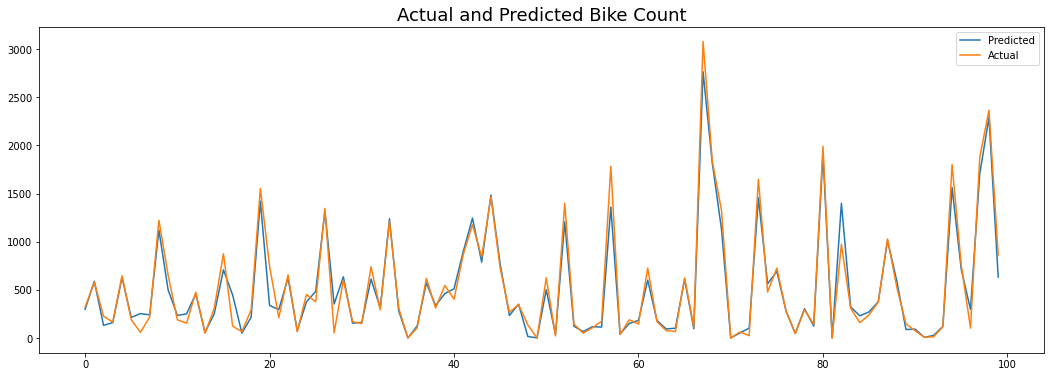

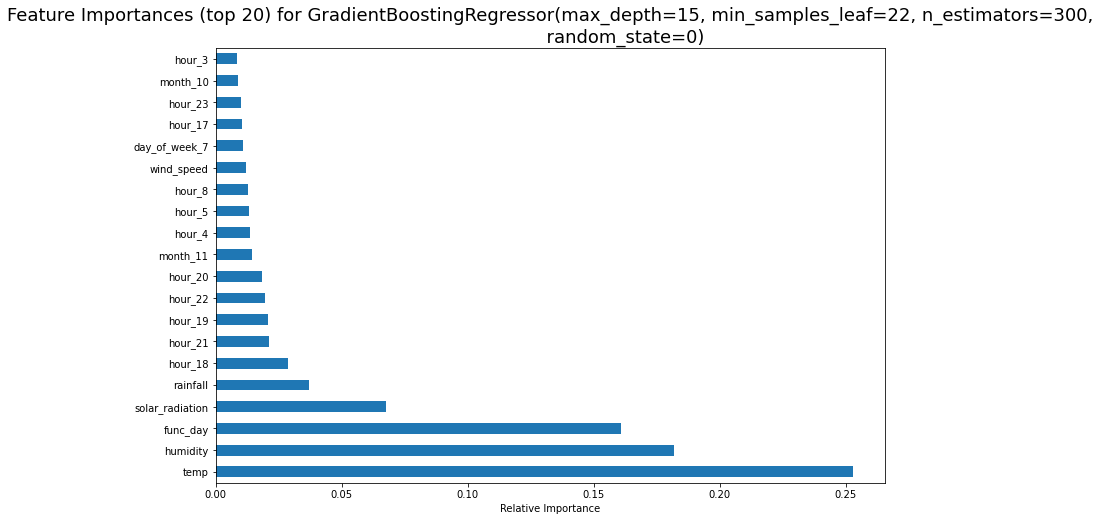

In [ ]:
#Evaluation matrices for GradientBoosting
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

##### Which hyperparameter optimization technique have you used and why?

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time we have decided to use Randomised search CV.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88314.413133             88326.665651     199251.139435   
RMSE                201.762204               201.697663        303.758212   
MAE                 297.177410               297.198024        446.375559   
Train R2              0.783590                 0.783570          0.520124   
Test R2               0.788985                 0.788956          0.523918   
Adjusted R2           0.782271                 0.782240          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88358.339895  88365.687345          88416.848175   
RMSE                        201.704255    201.717161            201.783323   
MAE                         297.251308    297.263666            297.349707   
Train R2                      0.783476      0.783460              0.783353   
Test R2                       0.788880      0.788863              0.788741   
Adjusted R2                   0.782162      0.782144              0.782018   

             Decision tree  Decision tree tuned  Random forest  \
MSE           73491.681507         89557.657073   38747.939049   
RMSE            152.067352           184.416490     112.347131   
MAE             271.093492           299.261854     196.844962   
Train R2          1.000000             0.837593       0.988169   
Test R2           0.824402             0.786015       0.907417   
Adjusted R2       0.818814             0.779206       0.904471   

             Random forest tuned  Gradient Boosting Regressor  \
MSE                 75962.323759                 77975.249202   
RMSE                  166.313903                   186.130057   
MAE                   275.612634                   279.240486   
Train R2                0.855883                     0.825825   
Test R2                 0.818499                     0.813689   
Adjusted R2             0.812723                     0.807761   

             Gradient Boosting Regressor Tuned  
MSE                               28399.672610  
RMSE                                 97.439312  
MAE                                 168.522024  
Train R2                              0.994765  
Test R2                               0.932143  
Adjusted R2                           0.929984

After using the Randomised search CV our model performs very well it gave accuracy 99% on train data & 93% on test data. which is very good model accuracy.

### ML Model - 7 : Xtreme Gradient Boosting Regressor

In [ ]:
# ML Model - 3 Implementation
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
# Fit the Algorithm
xgb_model.fit(X_train,y_train)
# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 77218.29577263865
RMSE : 277.8818018018428
MAE : 184.8832849740887
Train R2 : 0.8237160893167527
Test R2 : 0.8154979016597093
Adjusted R2 :  0.8096268861556576


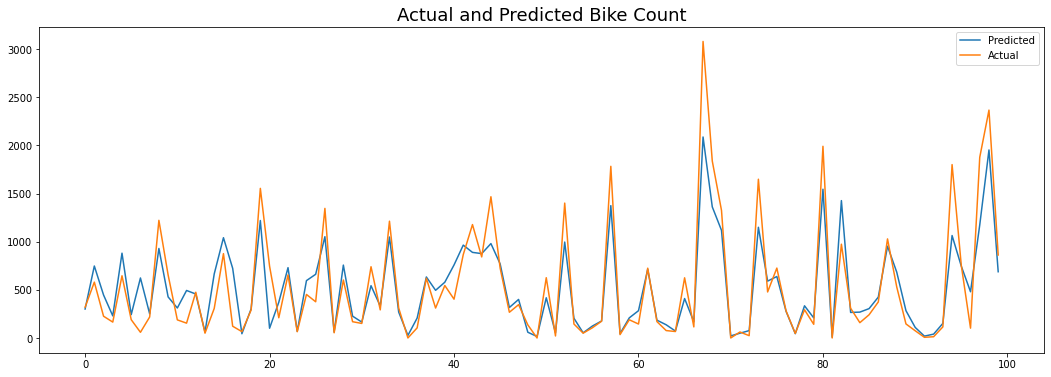

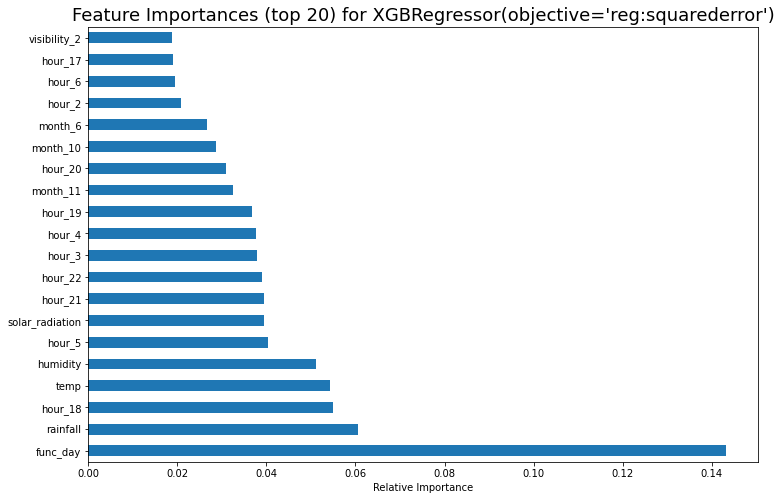

In [ ]:
# Evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Xtreme Gradient Boosting Regressor'] = result

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88314.413133             88326.665651     199251.139435   
RMSE                201.762204               201.697663        303.758212   
MAE                 297.177410               297.198024        446.375559   
Train R2              0.783590                 0.783570          0.520124   
Test R2               0.788985                 0.788956          0.523918   
Adjusted R2           0.782271                 0.782240          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88358.339895  88365.687345          88416.848175   
RMSE                        201.704255    201.717161            201.783323   
MAE                         297.251308    297.263666            297.349707   
Train R2                      0.783476      0.783460              0.783353   
Test R2                       0.788880      0.788863              0.788741   
Adjusted R2                   0.782162      0.782144              0.782018   

             Decision tree  Decision tree tuned  Random forest  \
MSE           73491.681507         89557.657073   38747.939049   
RMSE            152.067352           184.416490     112.347131   
MAE             271.093492           299.261854     196.844962   
Train R2          1.000000             0.837593       0.988169   
Test R2           0.824402             0.786015       0.907417   
Adjusted R2       0.818814             0.779206       0.904471   

             Random forest tuned  Gradient Boosting Regressor  \
MSE                 75962.323759                 77975.249202   
RMSE                  166.313903                   186.130057   
MAE                   275.612634                   279.240486   
Train R2                0.855883                     0.825825   
Test R2                 0.818499                     0.813689   
Adjusted R2             0.812723                     0.807761   

             Gradient Boosting Regressor Tuned  \
MSE                               28399.672610   
RMSE                                 97.439312   
MAE                                 168.522024   
Train R2                              0.994765   
Test R2                               0.932143   
Adjusted R2                           0.929984   

             Xtreme Gradient Boosting Regressor  
MSE                                77218.295773  
RMSE                                 184.883285  
MAE                                  277.881802  
Train R2                               0.823716  
Test R2                                0.815498  
Adjusted R2                            0.809627

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# xg boost
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}

In [ ]:
# finding best parameters
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [ ]:
# xg boost best parameters
xgb_best_params

{'n_estimators': 500, 'min_samples_leaf': 20}

In [ ]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [ ]:
# fit
xgb_model.fit(X_train,y_train)

[10:16:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(min_samples_leaf=20, n_estimators=500)

In [ ]:
# xtreme gradient boosting test predictions
y_pred_xgb = xgb_model.predict(X_test)

MSE : 39067.94176529151
RMSE : 197.65611997935076
MAE : 124.46460590105436
Train R2 : 0.9318596249776407
Test R2 : 0.906652728328062
Adjusted R2 :  0.9036823378329031


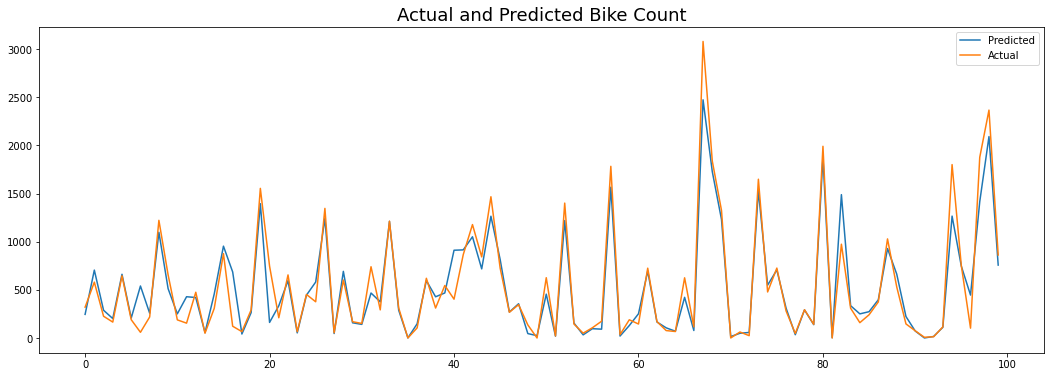

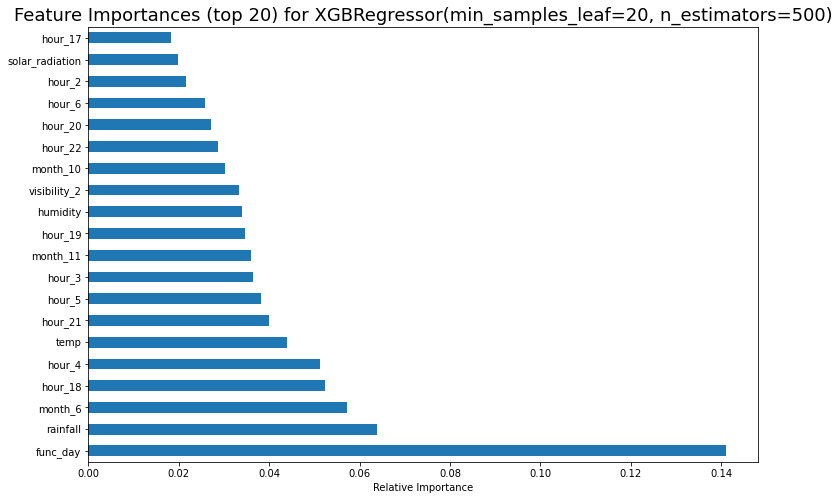

In [ ]:
#Evaluation matrices for XGBRegressor 
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Xtreme Gradient Boosting Regressor Tuned'] = result

In [ ]:
score

Linear regression  Linear regression tuned  Lasso regression  \
MSE               88314.413133             88326.665651     199251.139435   
RMSE                201.762204               201.697663        303.758212   
MAE                 297.177410               297.198024        446.375559   
Train R2              0.783590                 0.783570          0.520124   
Test R2               0.788985                 0.788956          0.523918   
Adjusted R2           0.782271                 0.782240          0.508768   

             Lasso with alpha = 0.0001         Ridge  Ridge with alpha = 5  \
MSE                       88358.339895  88365.687345          88416.848175   
RMSE                        201.704255    201.717161            201.783323   
MAE                         297.251308    297.263666            297.349707   
Train R2                      0.783476      0.783460              0.783353   
Test R2                       0.788880      0.788863              0.788741   
Adjusted R2                   0.782162      0.782144              0.782018   

             Decision tree  Decision tree tuned  Random forest  \
MSE           73491.681507         89557.657073   38747.939049   
RMSE            152.067352           184.416490     112.347131   
MAE             271.093492           299.261854     196.844962   
Train R2          1.000000             0.837593       0.988169   
Test R2           0.824402             0.786015       0.907417   
Adjusted R2       0.818814             0.779206       0.904471   

             Random forest tuned  Gradient Boosting Regressor  \
MSE                 75962.323759                 77975.249202   
RMSE                  166.313903                   186.130057   
MAE                   275.612634                   279.240486   
Train R2                0.855883                     0.825825   
Test R2                 0.818499                     0.813689   
Adjusted R2             0.812723                     0.807761   

             Gradient Boosting Regressor Tuned  \
MSE                               28399.672610   
RMSE                                 97.439312   
MAE                                 168.522024   
Train R2                              0.994765   
Test R2                               0.932143   
Adjusted R2                           0.929984   

             Xtreme Gradient Boosting Regressor  \
MSE                                77218.295773   
RMSE                                 184.883285   
MAE                                  277.881802   
Train R2                               0.823716   
Test R2                                0.815498   
Adjusted R2                            0.809627   

             Xtreme Gradient Boosting Regressor Tuned  
MSE                                      39067.941765  
RMSE                                       124.464606  
MAE                                        197.656120  
Train R2                                     0.931860  
Test R2                                      0.906653  
Adjusted R2                                  0.903682

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***